In [1]:
#Tyler code
import matplotlib as plt
import numpy
import seaborn as sns
import pandas as pd
import numpy as np



fig = plt.figure(figsize = (8, 4), dpi= 300)
fig.patch.set_facecolor('white')
plt.title('Empirical Measurments')
sns.violinplot(data         = MD_Boxplot, 
               density_norm = "area",
               cut          = 0,
               fill         = True,
               inner        = 'quart',
               alpha        = 0.5,
               zorder       = 1)
sns.boxplot(data         = MD_Boxplot, 
            showfliers   = False, 
            whis         = 0, 
            medianprops  = {"color": "black"}, 
            boxprops     = {"edgecolor": "black", 'zorder': 2, 'alpha': 1},
            whiskerprops = {"color": "black"}, 
            capprops     = {"color": "black"},
            width        = 0.3)
for index in range(len(Path_List)):
    y = pd.DataFrame(MD_Boxplot.iloc[basal_start:basal_end, index])
    y = np.array(y)[:, 0]
    y = np.round(y, 2)
    x = np.ones(y.shape) * -0.075 * 1.25 + index
    plt.scatter(x, y, color = "black", marker = 'D', 
                edgecolor='black', facecolor='none',
                label = 'Basal', s = 20, zorder = 3) 

    y = pd.DataFrame(MD_Boxplot.iloc[mid_start:mid_end, index])
    y = np.array(y)[:, 0]
    y = np.round(y, 2)
    x = np.ones(y.shape) * 0 + index
    plt.scatter(x, y, color = "black", marker = 's', 
                edgecolor='black', facecolor='none',
                label = 'Mid-Ventricular', s = 20, zorder = 3)   
    
    y = pd.DataFrame(MD_Boxplot.iloc[apical_start:apical_end, index])
    y = np.array(y)[:, 0]
    y = np.round(y, 2)
    x = np.ones(y.shape) * 0.075 * 1.25 + index
    plt.scatter(x, y, color = "black", marker = '*', e
                edgecolor='black', facecolor='none',
                label = 'Apical', s = 45, zorder = 3) 
plt.xlim([-0.5, 5.5])
x_ticks = [0, 1, 2, 3, 4, 5]
plt.ylim(1.0, 2.2)
plt.xticks(ticks = x_ticks, labels = dataset_list)
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), ncol = 3, loc = 9)
# plt.axis('equal')

plt.ylabel('Mean Diffusivity [$μm^2 / ms$]')
plt.tight_layout()
plt.show()

TypeError: 'module' object is not callable

In [41]:
def Data_Representation(Data_List):
    from numpy import zeros as ZEROS
    from numpy import copy  as COPY
    number_of_volunteers = len(Data_List)
    number_of_slices     = len(Data_List[0]) 
    Data_Matrix          = ZEROS((number_of_volunteers, number_of_slices))
    Pooled_Labels        = []
    for vol in range(number_of_volunteers):
        for slc in range(number_of_slices):
            Pooled_Labels.append([vol, slc])
            Data_Matrix[vol, slc] = Data_List[vol][slc]
    Data_Per_Slice     = COPY(Data_Matrix.T)
    Data_Per_Volunteer = COPY(Data_Matrix)
    Data_Pooled        = COPY(Data_Matrix.flatten())
    Data = dict()
    Data['Pooled']     = Data_Pooled 
    Data['Slice']      = Data_Per_Slice
    Data['Volunteer']  = Data_Per_Volunteer
    Data['Pooled Key'] = Pooled_Labels
    return Data

In [42]:
#Making json file into csv:


import json
import pandas as pd

json_path = '/Users/saschastocker/Documents/Stanford/work2024/WholeHeartCropISMRM/nnUNetResults/Run8/Dataset008_MDandAverageLVANDIPPrediction/nnUNetTrainer_100epochs__nnUNetPlans__2d/fold_5/validation/summary.json'

# Load the JSON data
with open(json_path, 'r') as f:
    data = json.load(f)
# Initialize lists to hold the data
case_ids = []
labels = []
dice_scores = []

# Iterate over each case in 'metric_per_case'
for case_index, case in enumerate(data['metric_per_case']):
    # You can extract a case ID from the file name or use the index
    prediction_file = case['prediction_file']
    case_id = prediction_file.split('/')[-1]  # Get the file name as case ID
    # Remove file extension if needed
    case_id = case_id.replace('.nii.gz', '')
    
    metrics = case['metrics']
    for label, metric_values in metrics.items():
        dice = metric_values['Dice']
        case_ids.append(case_id)
        labels.append(f'Label {label}')
        dice_scores.append(dice)

# Create a DataFrame
df = pd.DataFrame({
    'Case ID': case_ids,
    'Label': labels,
    'Dice Score': dice_scores
})

# Save the DataFrame to a CSV file
csv_file_path = '/Users/saschastocker/Documents/Stanford/work2024/WholeHeartCropISMRM/nnUNetResults/Run8/Dataset008_MDandAverageLVANDIPPrediction/nnUNetTrainer_100epochs__nnUNetPlans__2d/fold_5/validation/dice_scores_per_case.csv'
df.to_csv(csv_file_path, index=False)

print(f'Data saved to {csv_file_path}')


Data saved to /Users/saschastocker/Documents/Stanford/work2024/WholeHeartCropISMRM/nnUNetResults/Run8/Dataset008_MDandAverageLVANDIPPrediction/nnUNetTrainer_100epochs__nnUNetPlans__2d/fold_5/validation/dice_scores_per_case.csv


                                Case ID    Label  Dice Score  Slice Number  \
0  Le_Volunteer_01_DiVO_06_10_slice_002  Label 1    0.854368             2   
1  Le_Volunteer_01_DiVO_06_10_slice_002  Label 2    0.810458             2   
2  Le_Volunteer_01_DiVO_06_10_slice_002  Label 3    0.790541             2   
3  Le_Volunteer_01_DiVO_12_05_slice_002  Label 1    0.837430             2   
4  Le_Volunteer_01_DiVO_12_05_slice_002  Label 2    0.506579             2   

   Dice Score Original Label 1  Hausdorff Distance Label 2  \
0                     0.864525                    0.566558   
1                     0.864525                    0.566558   
2                     0.864525                    0.566558   
3                     0.832126                    1.000000   
4                     0.832126                    1.000000   

   Hausdorff Distance Label 3  Mean Percentage Difference Label 1  \
0                     0.23282                            1.766649   
1                   

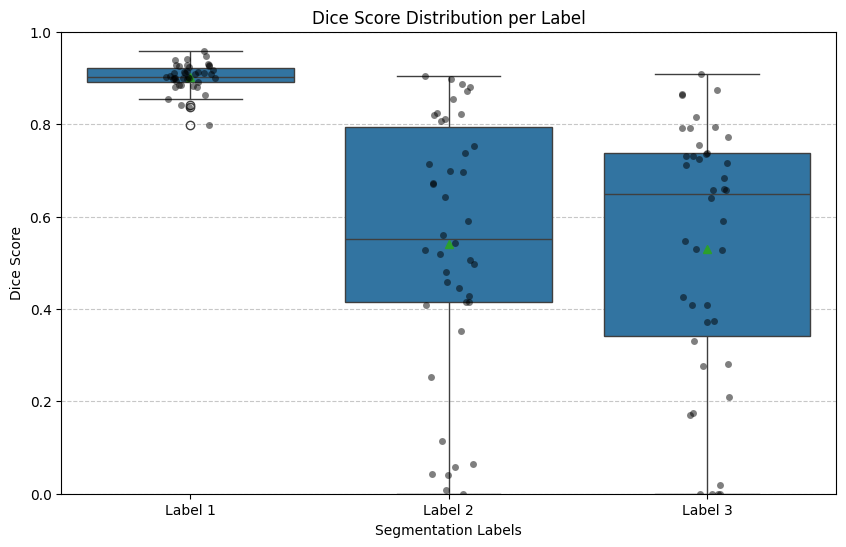

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV data
main=  '/Users/saschastocker/Documents/Stanford/work2024/WholeHeartCropISMRM/nnUNetResults'
csv_file_path = f'{main}/Run12/dice_scores_per_case.csv' 
df = pd.read_csv(csv_file_path)

# Preview the data
print(df.head())

# Set the figure size
plt.figure(figsize=(10, 6))

# Create the boxplot
sns.boxplot(x='Label', y='Dice Score', data=df, showmeans=True)

# Add individual data points
sns.stripplot(x='Label', y='Dice Score', data=df, color='black', alpha=0.5, jitter=True)

# Customize the plot
plt.title('Dice Score Distribution per Label')
plt.xlabel('Segmentation Labels')
plt.ylabel('Dice Score')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()

# (Optional) Save the plot to a file
# output_plot_path = '/path/to/save/dice_score_boxplot.png'
# plt.savefig(output_plot_path, dpi=300, bbox_inches='tight')
# print(f'Plot saved to {output_plot_path}')


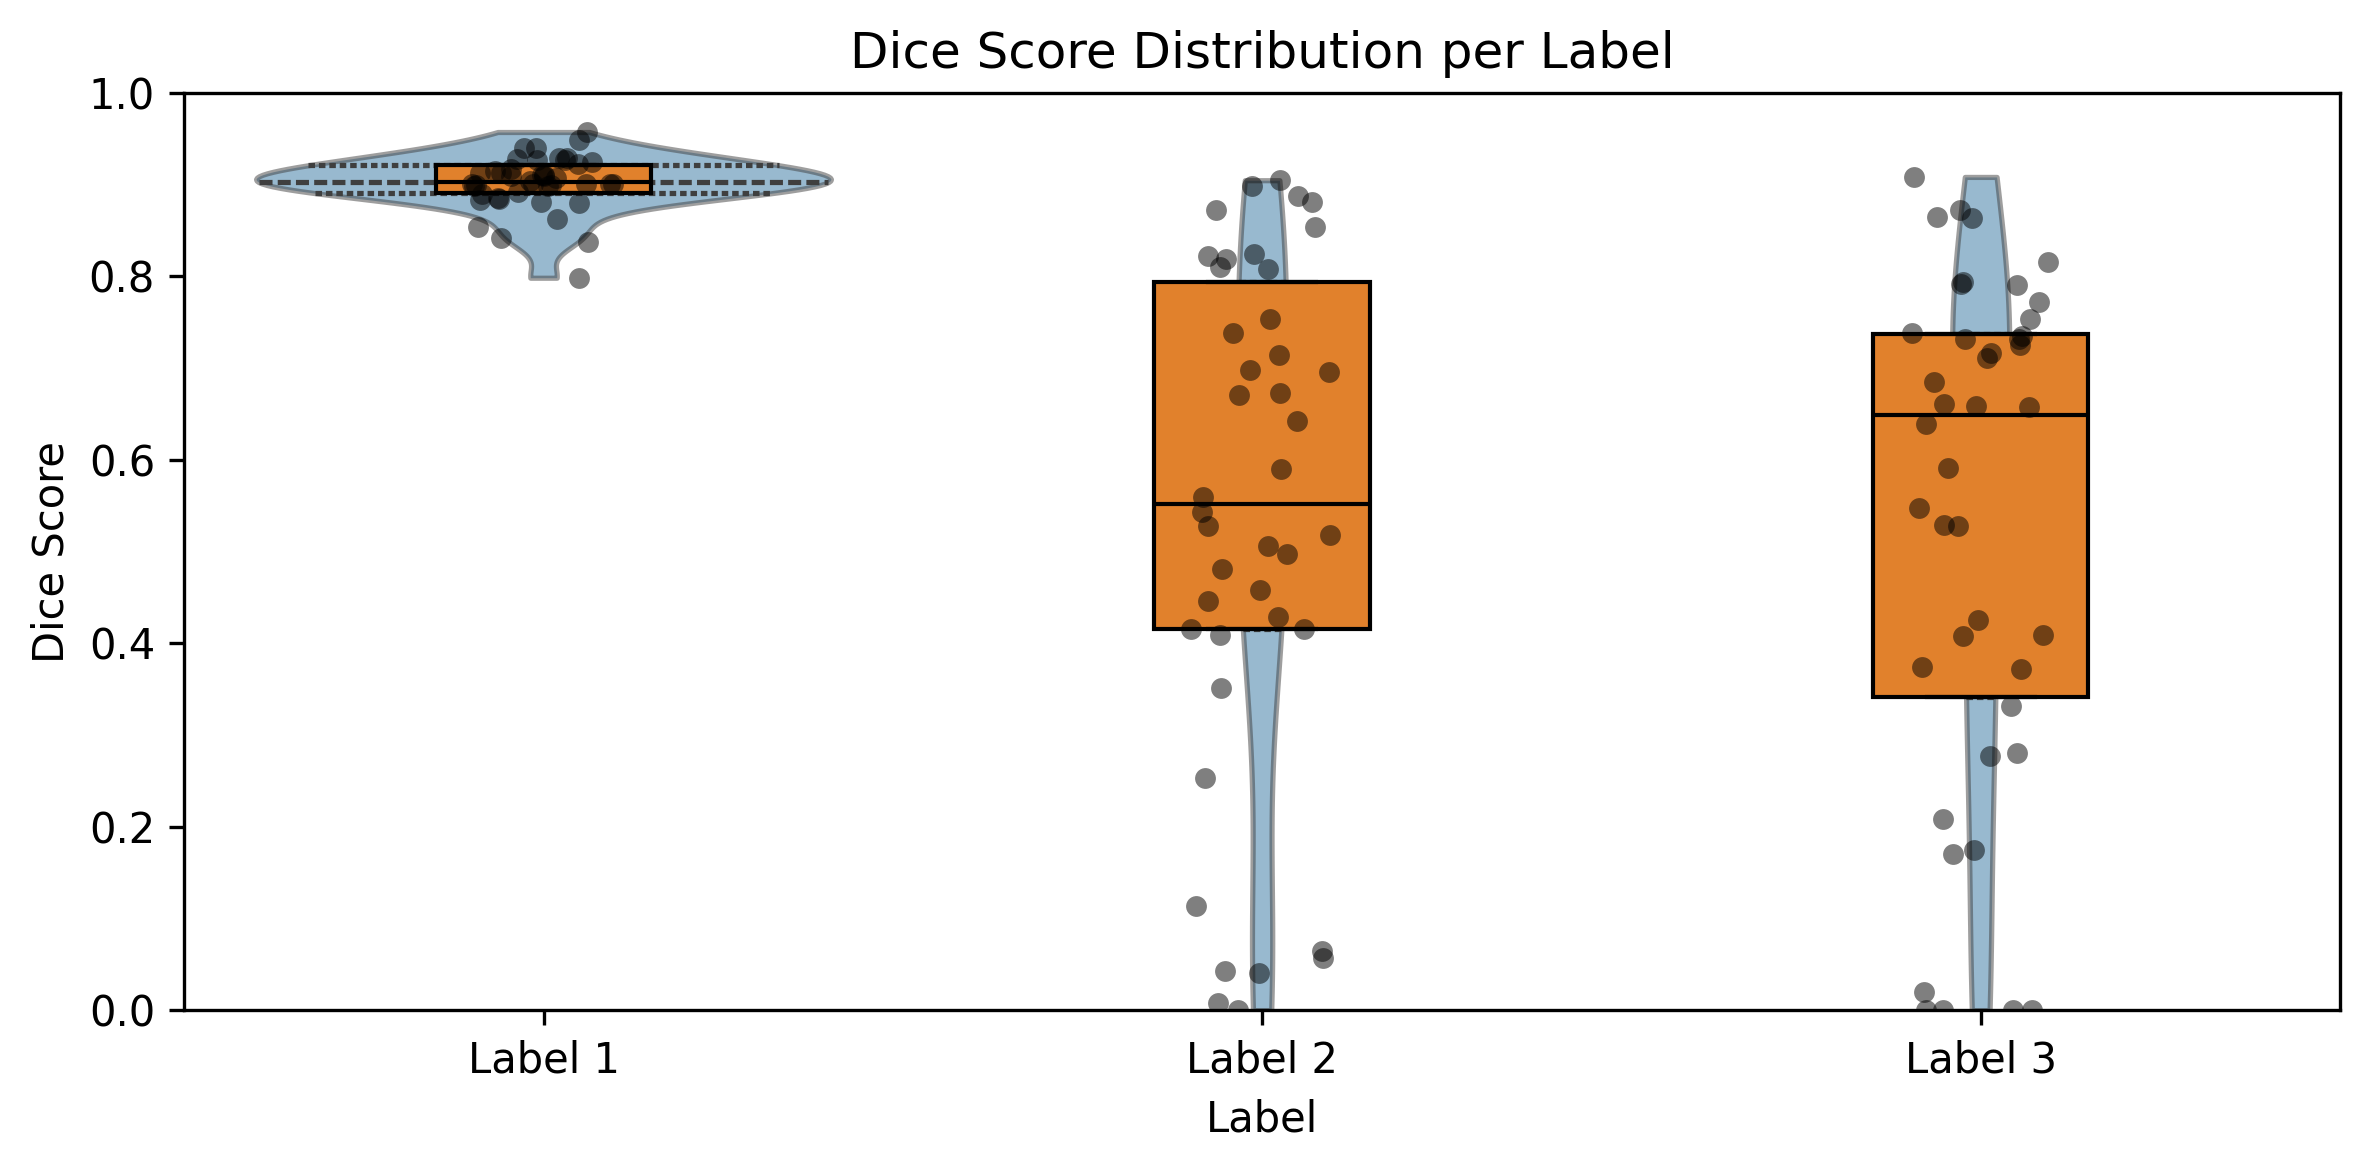

In [15]:
# Set up the figure
fig = plt.figure(figsize=(8, 4), dpi=300)
fig.patch.set_facecolor('white')
plt.title('Dice Score Distribution per Label')

# Create the violin plot
sns.violinplot(x='Label', y='Dice Score', data=df,
               cut=0,
               inner='quartile',
               alpha=0.5,
               zorder=1)

# Create the boxplot on top of the violin plot
sns.boxplot(x='Label', y='Dice Score', data=df,
            showfliers=False,
            whis=0,
            medianprops={"color": "black"},
            boxprops={"edgecolor": "black", 'zorder': 2, 'alpha': 1},
            whiskerprops={"color": "black"},
            capprops={"color": "black"},
            width=0.3)

# Optional: Add individual data points using stripplot
sns.stripplot(x='Label', y='Dice Score', data=df,
              color='black', alpha=0.5, jitter=True, zorder=3)

# Set axes labels and limits
plt.xlabel('Label')
plt.ylabel('Dice Score')
plt.ylim(0, 1)  # Assuming Dice scores range from 0 to 1

# Remove the legend (since we no longer have multiple datasets or regions)
plt.legend([], [], frameon=False)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


/var/folders/9r/mlgf66555t98p7ptk_n0g21r0000gn/T/ipykernel_52889/4021790747.py:31: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='area'` for the same effect.
  sns.violinplot(


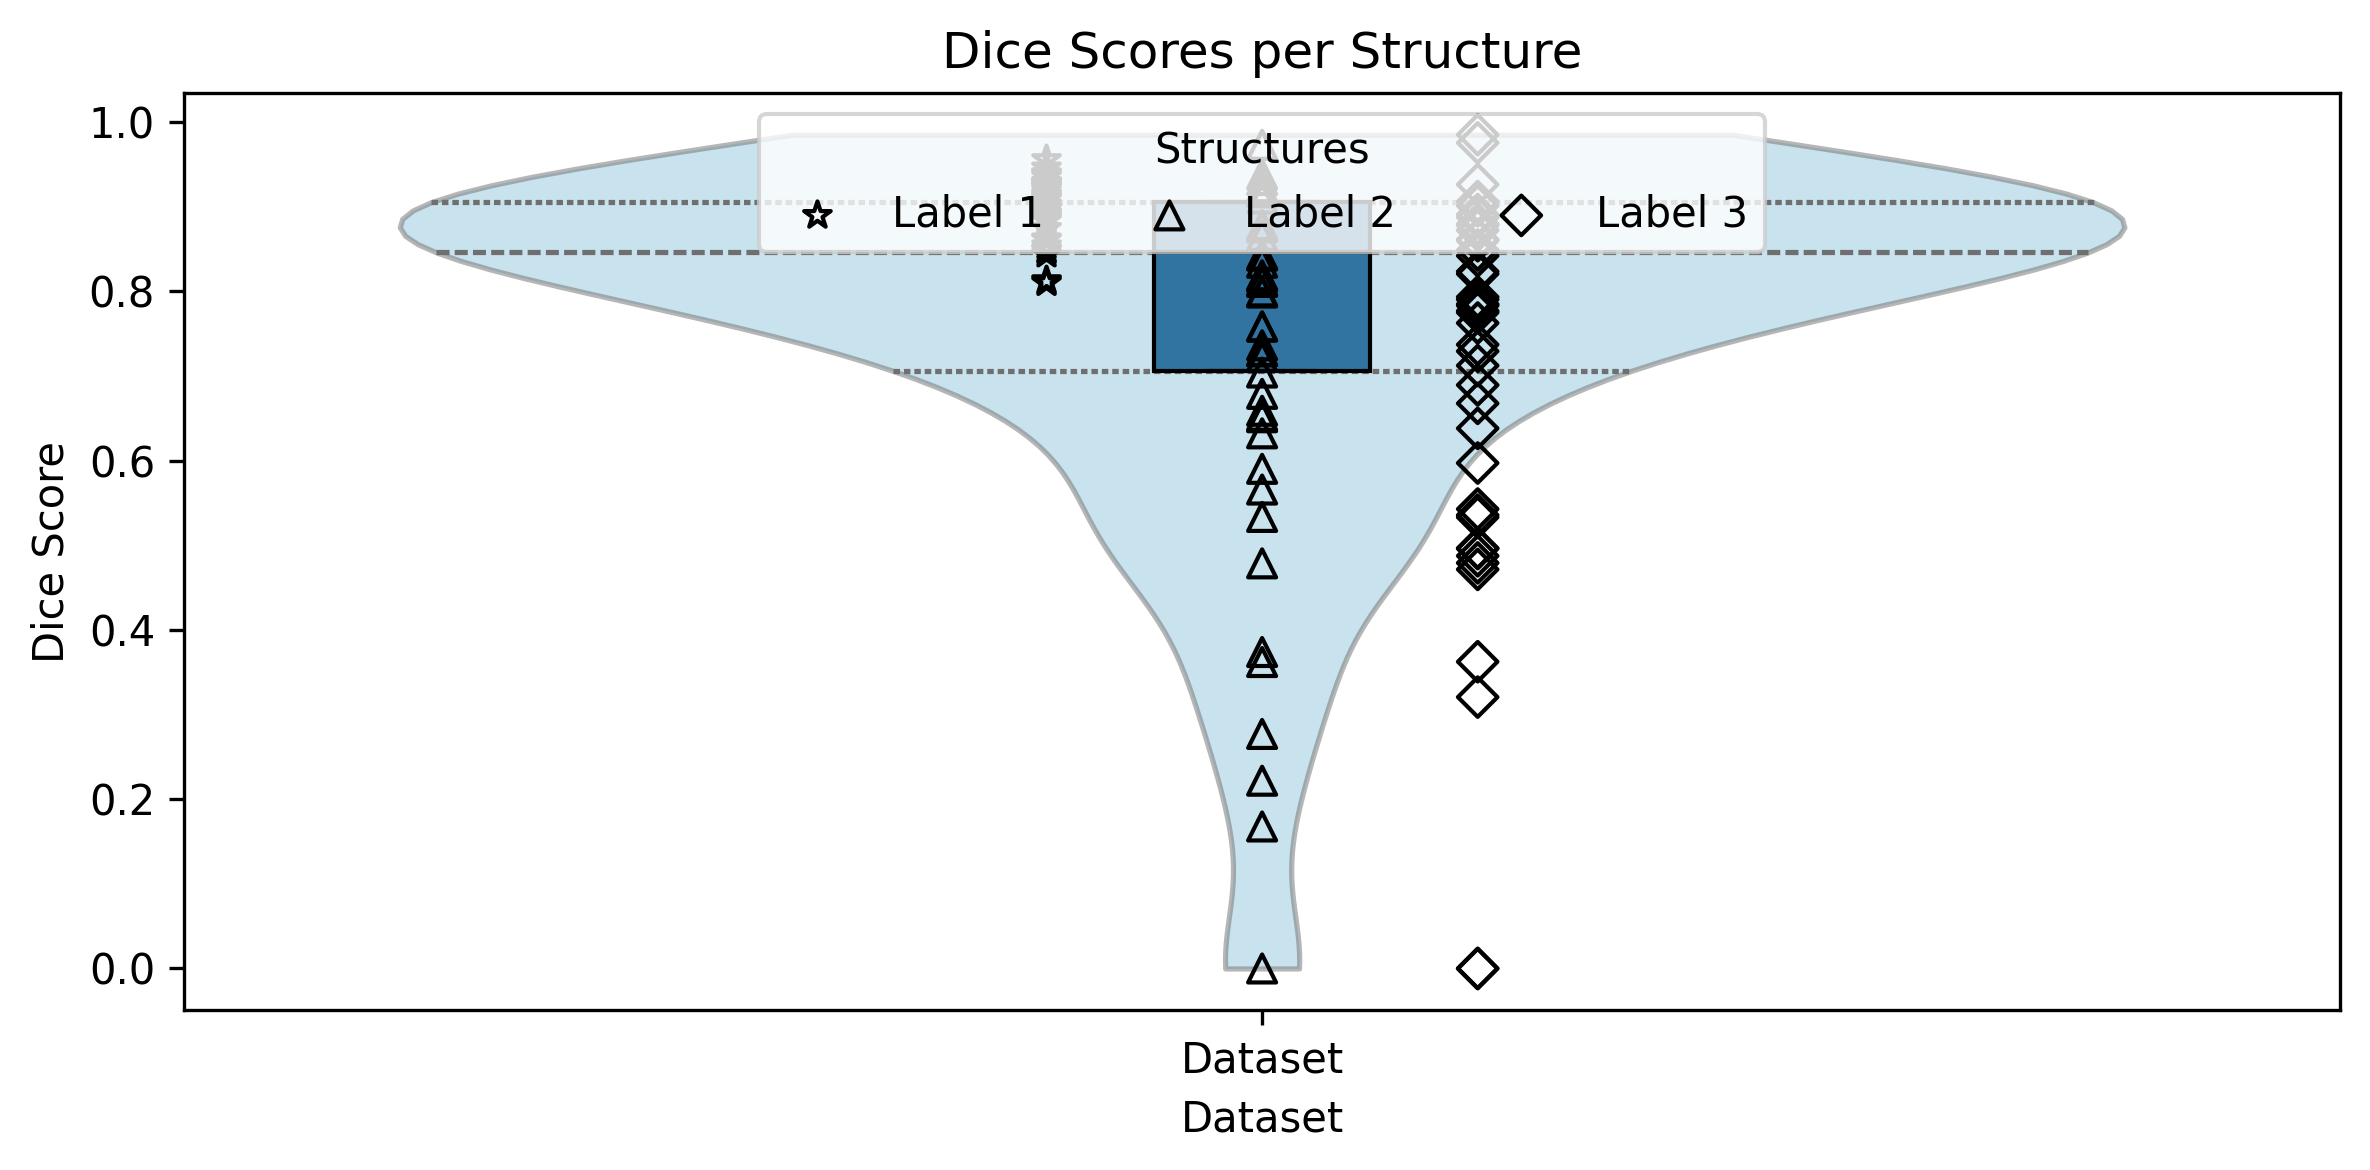

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load your CSV data into a DataFrame
csv_file_path = '/Users/saschastocker/Documents/Stanford/work2024/WholeHeartCropISMRM/nnUNetResults/Run10/nnUNetTrainer_100epochs__nnUNetPlans__2d/fold_5/validation/dice_scores_per_case.csv'
df = pd.read_csv(csv_file_path)

# Since you have only one dataset, create a 'Dataset' column for plotting
df['Dataset'] = 'My Data'

# Define marker and offset mappings for labels
marker_mapping = {
    'Label 1': '*',   # Star for LV
    'Label 2': '^',   # Triangle up for Anterior Insertion Point
    'Label 3': 'D'    # Diamond for Inferior Insertion Point
}

offset_mapping = {
    'Label 1': -0.1,
    'Label 2': 0,
    'Label 3': 0.1
}

# Set up the plot
plt.figure(figsize=(8, 4), dpi=300)
plt.title('Dice Scores per Structure')

# Create the violin plot for all data
sns.violinplot(
    x='Dataset',
    y='Dice Score',
    data=df,
    cut=0,
    inner='quartile',
    scale='area',
    color='skyblue',
    alpha=0.5,
    zorder=1
)

# Add the boxplot on top
sns.boxplot(
    x='Dataset',
    y='Dice Score',
    data=df,
    width=0.1,
    showfliers=False,
    whis=0,
    medianprops={"color": "black"},
    boxprops={"edgecolor": "black", 'zorder': 2, 'alpha': 1},
    whiskerprops={"color": "black"},
    capprops={"color": "black"},
    zorder=2
)

# Plot individual data points with different markers for each label
x_pos = 0  # x position for 'My Data'
labels = df['Label'].unique()

for label in labels:
    y = df[df['Label'] == label]['Dice Score']
    x = np.ones(len(y)) * x_pos + offset_mapping[label]
    plt.scatter(
        x,
        y,
        color='black',
        marker=marker_mapping[label],
        edgecolor='black',
        facecolor='none',
        s=45,
        zorder=3,
        label=label
    )

# Remove duplicate labels in the legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(
    by_label.values(),
    by_label.keys(),
    ncol=3,
    loc='upper center',
    title='Structures'
)

# Adjust x-axis limits and labels
plt.xlim(-0.5, 0.5)
plt.xticks([x_pos], ['Dataset'])

# Set labels and layout
plt.ylabel('Dice Score')
plt.tight_layout()
plt.show()


/var/folders/9r/mlgf66555t98p7ptk_n0g21r0000gn/T/ipykernel_52889/1141784576.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
/var/folders/9r/mlgf66555t98p7ptk_n0g21r0000gn/T/ipykernel_52889/1141784576.py:71: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='area'` for the same effect.
  sns.violinplot(
/var/folders/9r/mlgf66555t98p7ptk_n0g21r0000gn/T/ipykernel_52889/1141784576.py:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


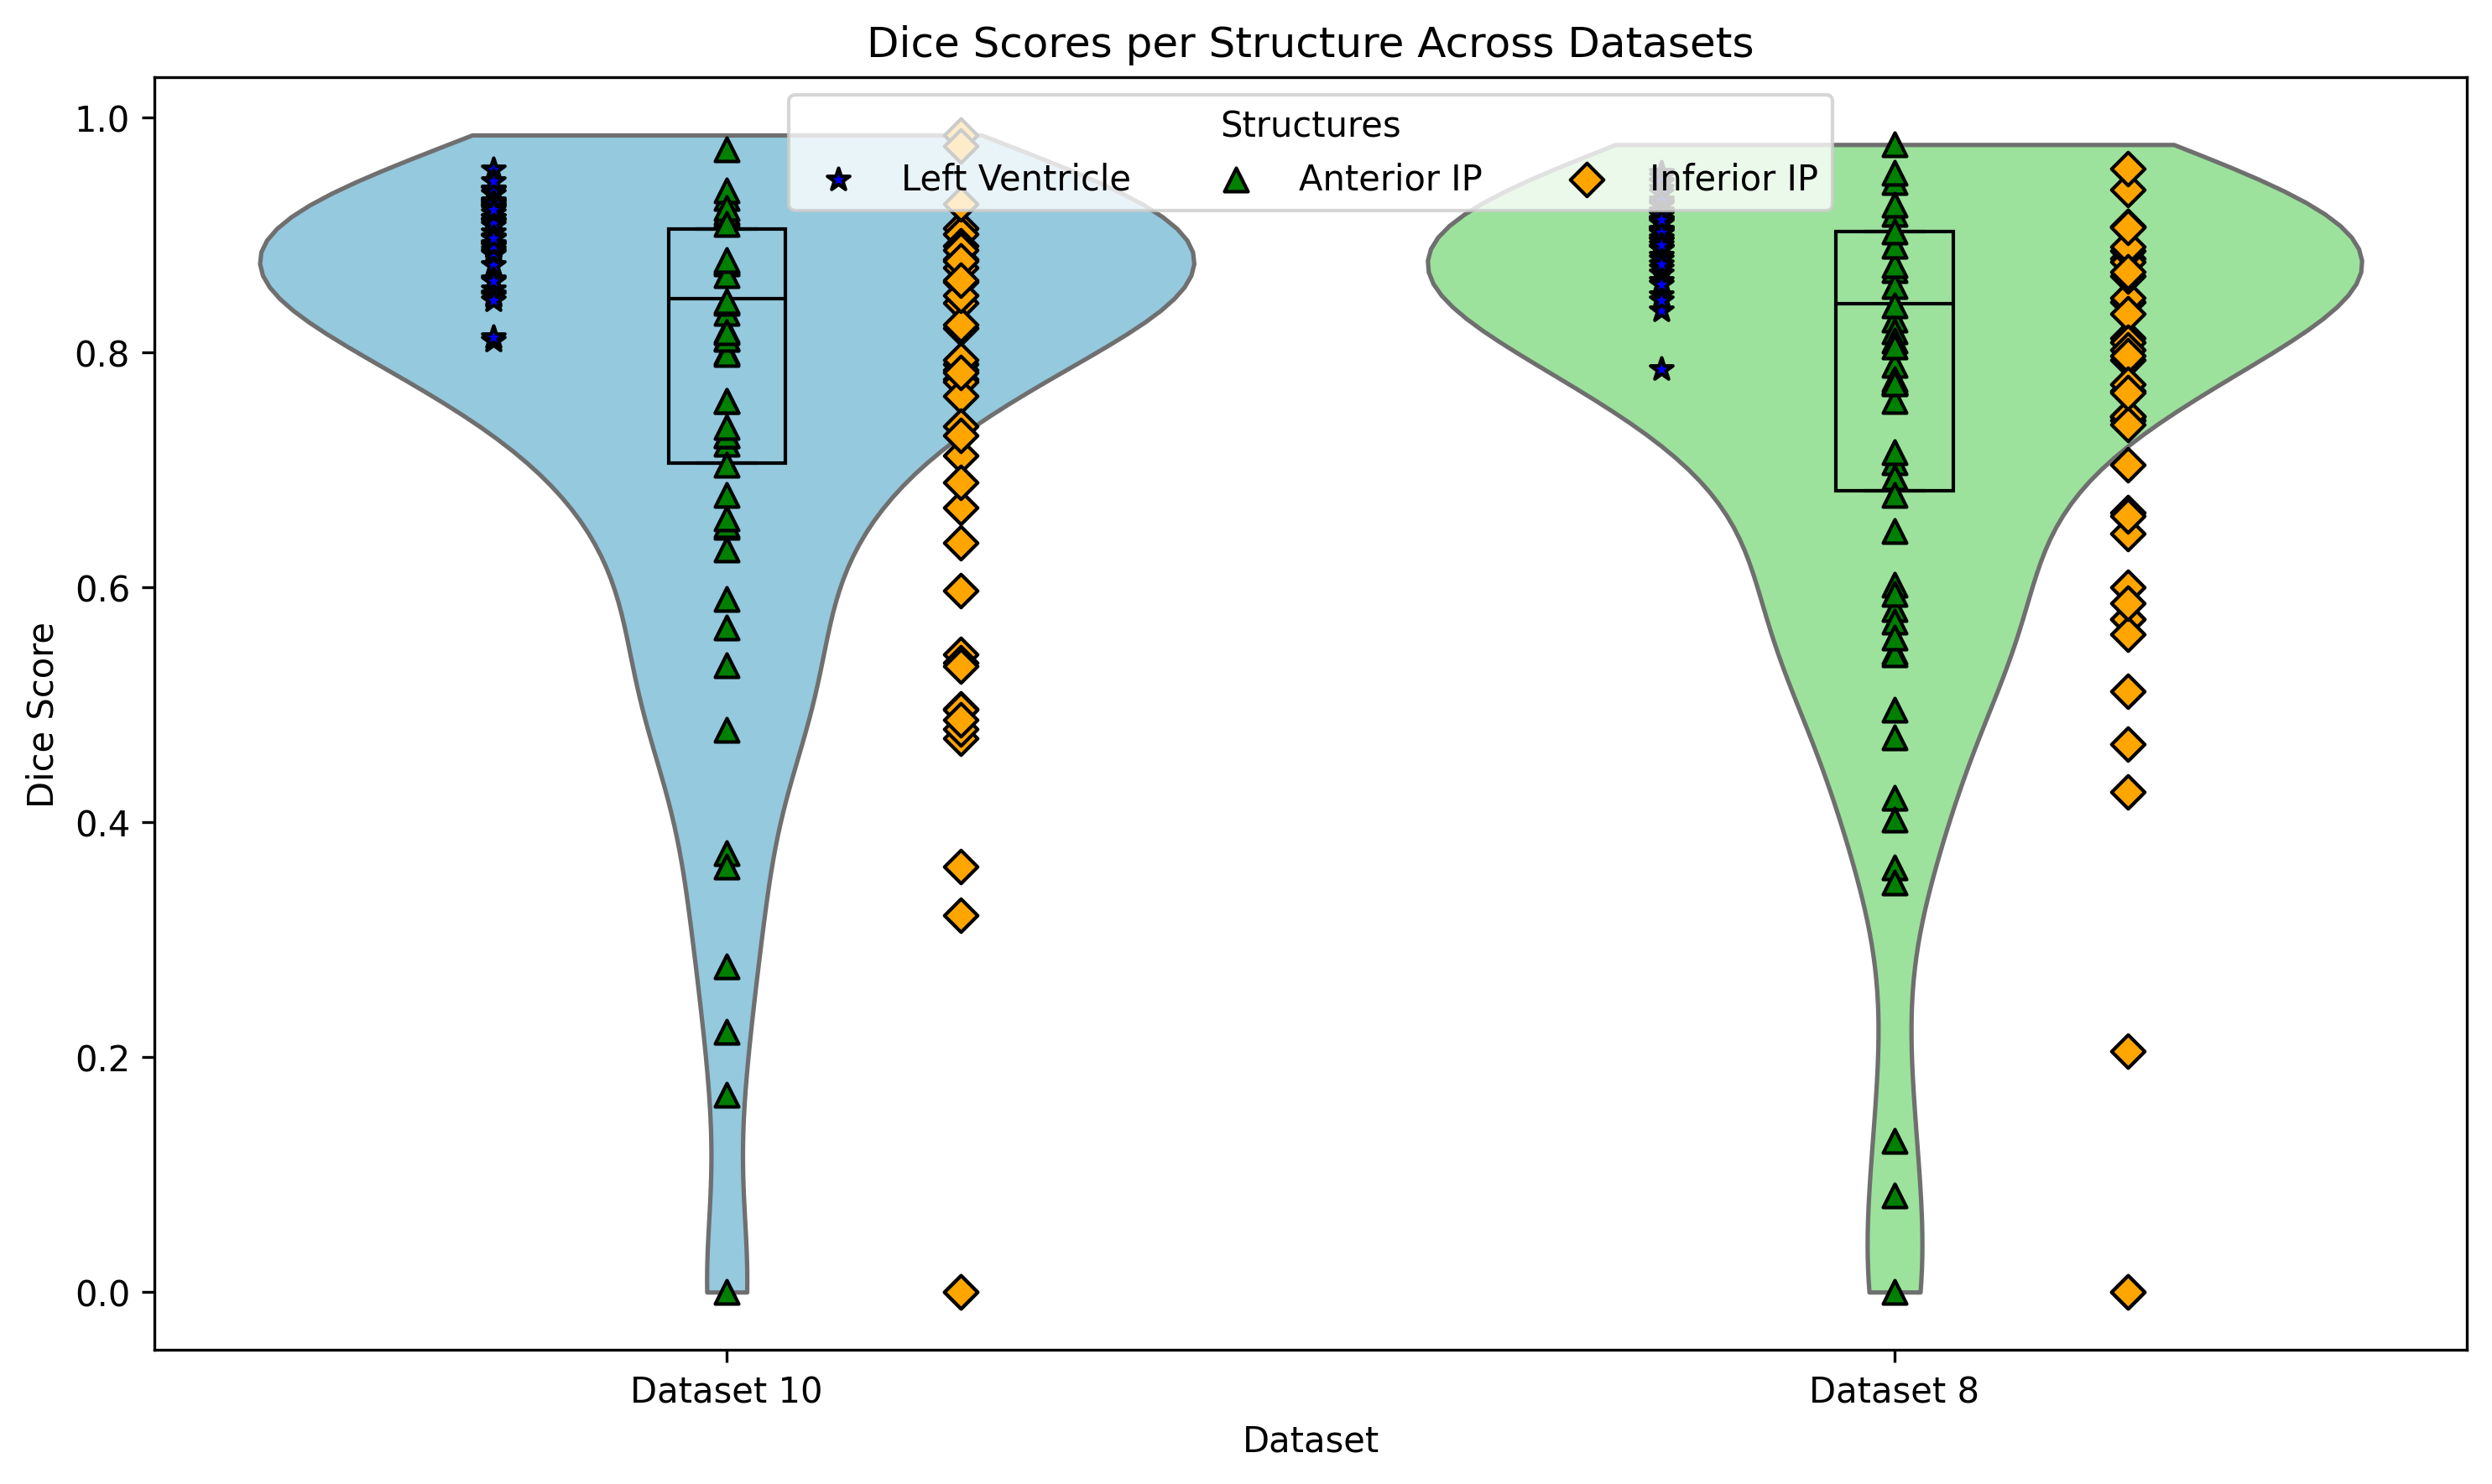

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# List of CSV file paths
csv_file_paths = [
    '/Users/saschastocker/Documents/Stanford/work2024/WholeHeartCropISMRM/nnUNetResults/Run10/nnUNetTrainer_100epochs__nnUNetPlans__2d/fold_5/validation/dice_scores_per_case.csv',
    '/Users/saschastocker/Documents/Stanford/work2024/WholeHeartCropISMRM/nnUNetResults/Run8/Dataset008_MDandAverageLVANDIPPrediction/nnUNetTrainer_100epochs__nnUNetPlans__2d/fold_5/validation/dice_scores_per_case.csv',
]

# Corresponding dataset names for labeling
dataset_names = [
    'Dataset 10',
    'Dataset 8',
]

# Define a color palette for each dataset (used in violin and box plots)
dataset_palette = {
    'Dataset 10': 'skyblue',
    'Dataset 8': 'lightgreen',
}

# Initialize a list to hold DataFrames
df_list = []

# Loop over the file paths and dataset names
for csv_file_path, dataset_name in zip(csv_file_paths, dataset_names):
    # Load the CSV data into a DataFrame
    df = pd.read_csv(csv_file_path)
    # Add a 'Dataset' column
    df['Dataset'] = dataset_name
    # Append to the list
    df_list.append(df)

# Concatenate all DataFrames
df_all = pd.concat(df_list, ignore_index=True)

# Define marker and offset mappings for labels
marker_mapping = {
    'Label 1': '*',   # Star for LV
    'Label 2': '^',   # Triangle up for Anterior Insertion Point
    'Label 3': 'D'    # Diamond for Inferior Insertion Point
}

offset_mapping = {
    'Label 1': -0.2,
    'Label 2': 0,
    'Label 3': 0.2
}

# Mapping from Label to readable names
label_name_mapping = {
    'Label 1': 'Left Ventricle',
    'Label 2': 'Anterior IP',
    'Label 3': 'Inferior IP'
}

# Define colors for labels (used in scatter points)
label_color_mapping = {
    'Label 1': 'blue',
    'Label 2': 'green',
    'Label 3': 'orange'
}

# Set up the plot
plt.figure(figsize=(10, 6), dpi=300)
plt.title('Dice Scores per Structure Across Datasets')

# Create the violin plot for all datasets with different colors
sns.violinplot(
    x='Dataset',
    y='Dice Score',
    data=df_all,
    cut=0,
    inner=None,  # No inner quartiles, we'll add boxplots
    scale='area',
    palette=dataset_palette,   # Use the dataset palette
    zorder=1
)

# Add the boxplot on top with matching colors
sns.boxplot(
    x='Dataset',
    y='Dice Score',
    data=df_all,
    width=0.1,
    showfliers=False,
    whis=0,
    palette=dataset_palette,   # Use the dataset palette
    medianprops={"color": "black"},
    boxprops={"edgecolor": "black", 'zorder': 2},
    whiskerprops={"color": "black"},
    capprops={"color": "black"},
    zorder=2
)

# Plot individual data points with fixed label colors across datasets
dataset_positions = range(len(dataset_names))  # x positions for datasets
for x_pos, dataset_name in zip(dataset_positions, dataset_names):
    df_dataset = df_all[df_all['Dataset'] == dataset_name]
    labels_in_dataset = df_dataset['Label'].unique()
    for label in labels_in_dataset:
        y = df_dataset[df_dataset['Label'] == label]['Dice Score']
        x = np.ones(len(y)) * x_pos + offset_mapping[label]
        plt.scatter(
            x,
            y,
            color=label_color_mapping[label],  # Use label color
            marker=marker_mapping[label],
            edgecolor='black',
            s=45,
            zorder=3,
            label=label_name_mapping[label] if x_pos == 0 else ""  # Only label once in the legend
        )

# Remove duplicate labels in the legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(
    by_label.values(),
    by_label.keys(),
    ncol=3,
    loc='upper center',
    title='Structures'
)

# Set labels and layout
plt.ylabel('Dice Score')
plt.xlabel('Dataset')
plt.tight_layout()
plt.show()


/var/folders/9r/mlgf66555t98p7ptk_n0g21r0000gn/T/ipykernel_85264/2608273835.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


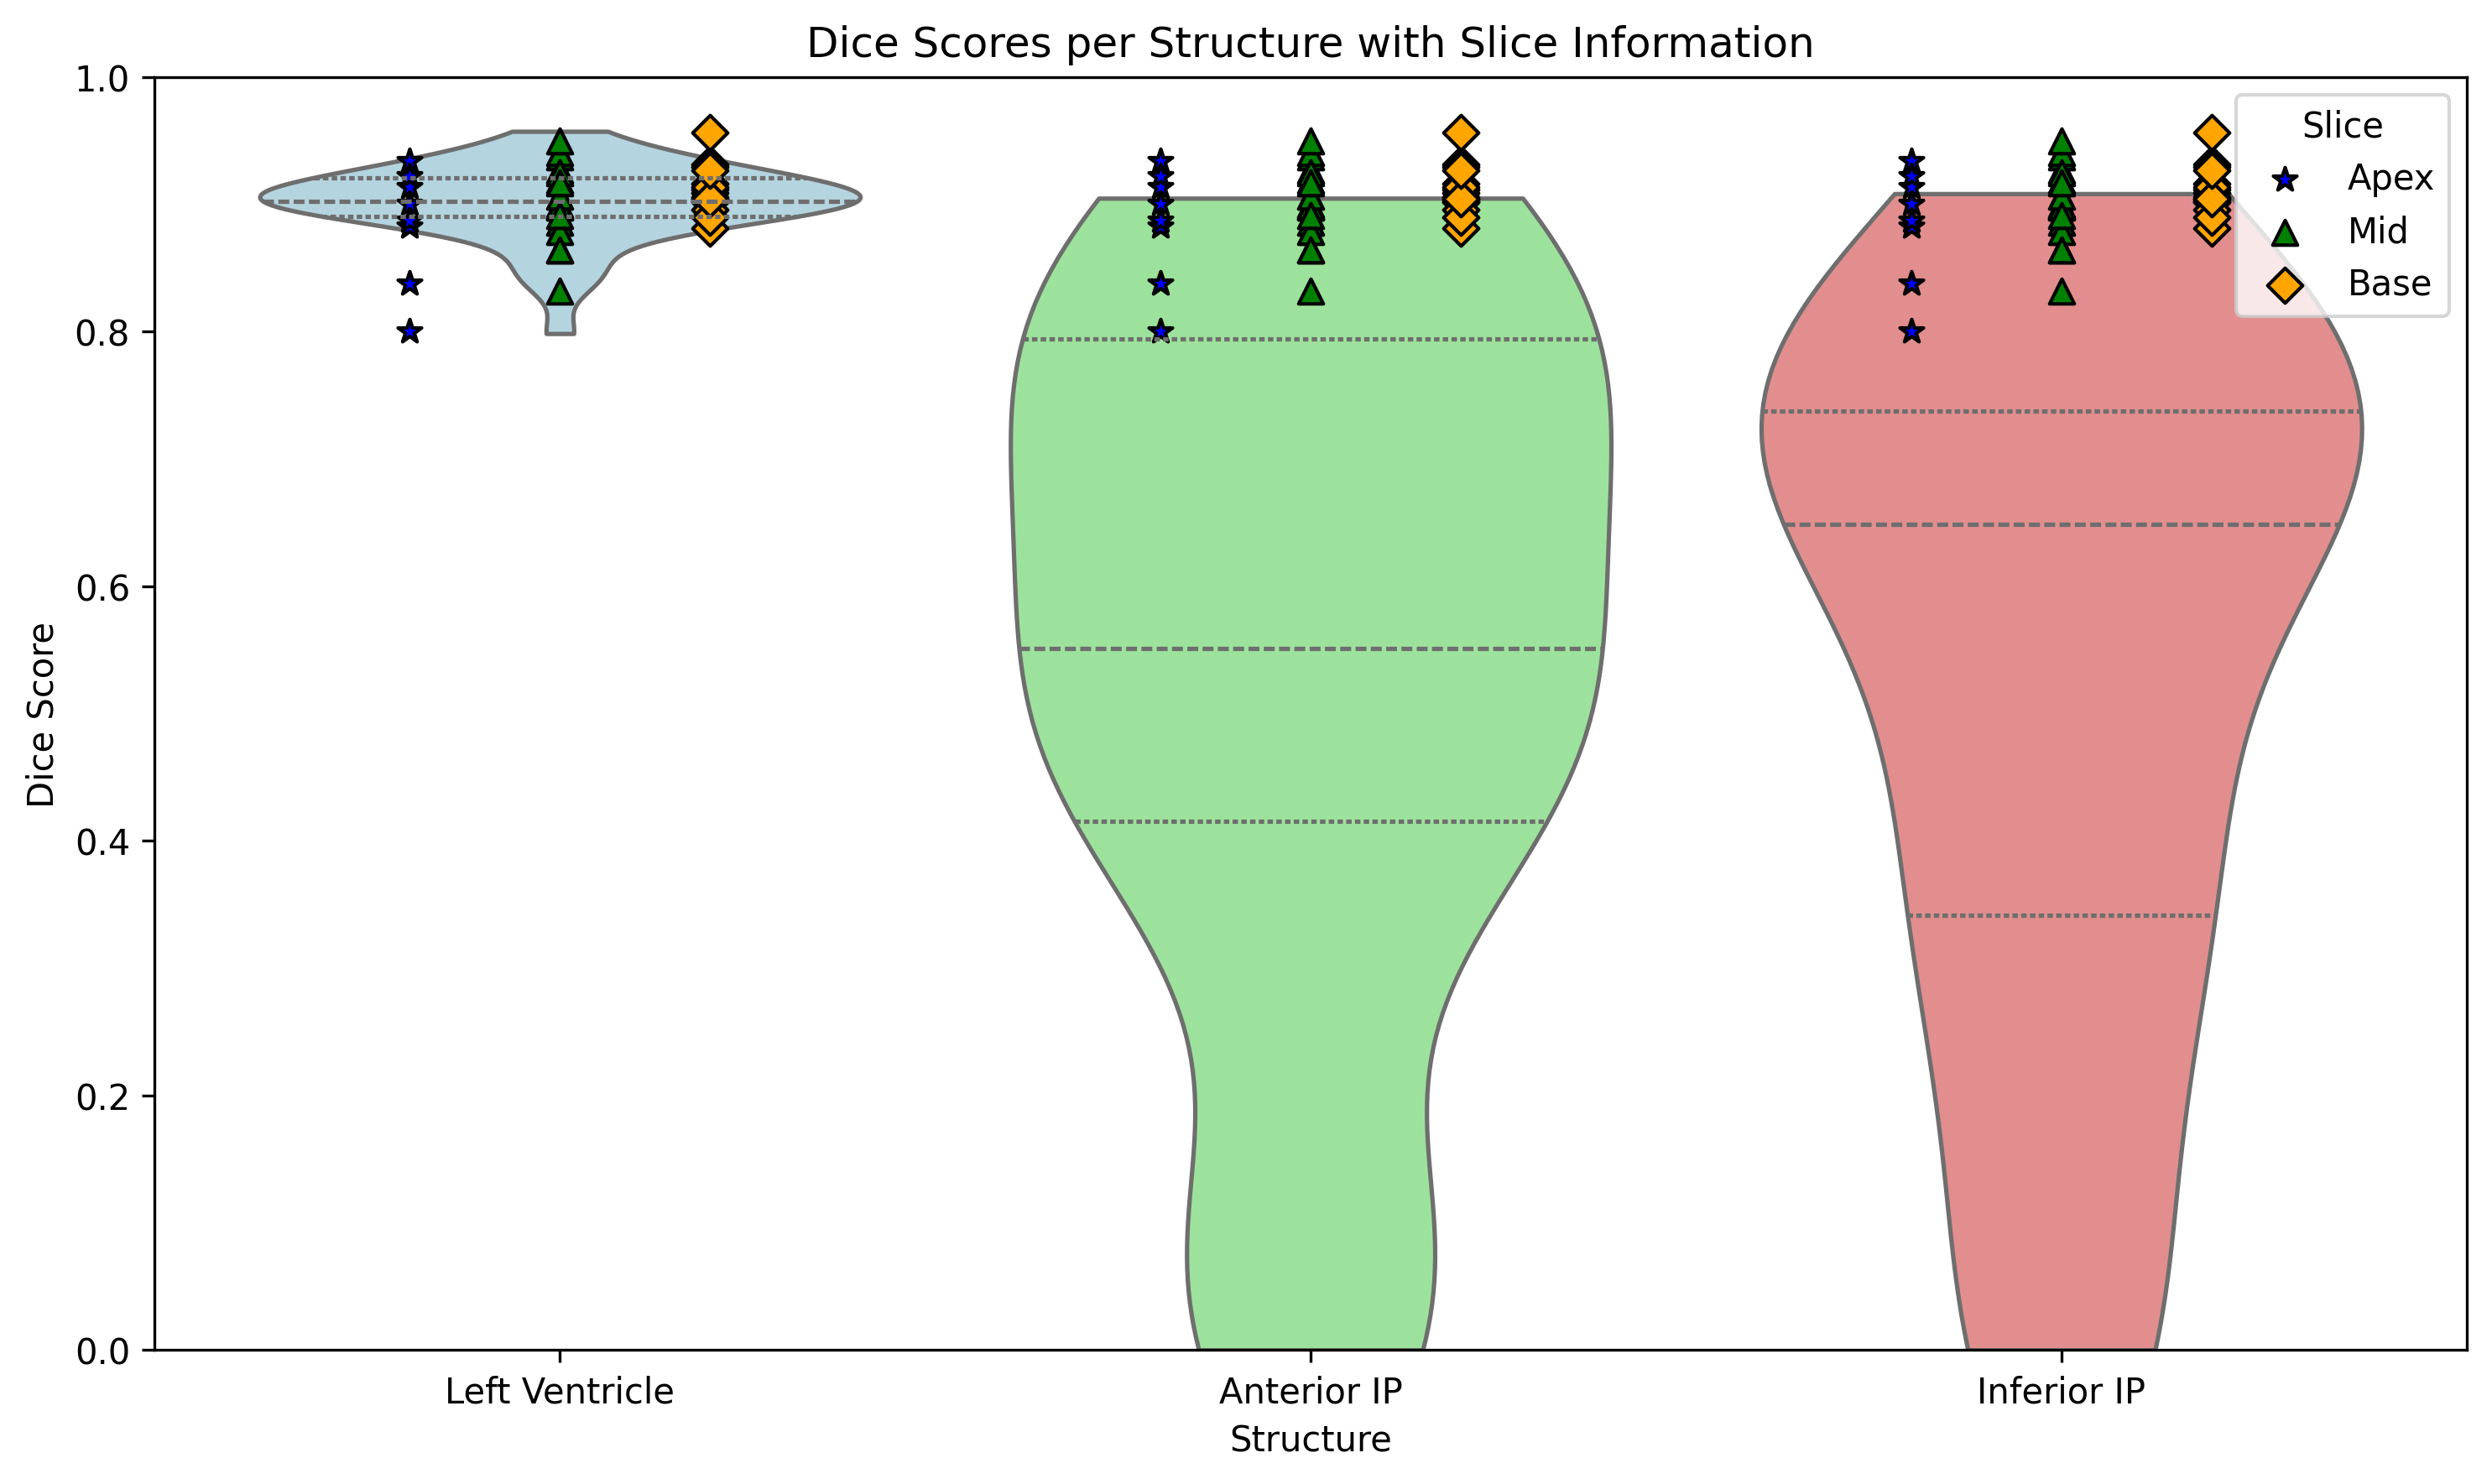

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load your data (adjust the CSV file path to the dataset you want to plot)
main=  '/Users/saschastocker/Documents/Stanford/work2024/WholeHeartCropISMRM/nnUNetResults'
csv_file_path = f'{main}/Run12/dice_scores_per_case.csv' 
df = pd.read_csv(csv_file_path)

# Ensure 'Label' column is of type string
df['Label'] = df['Label'].astype(str)

# Extract 'Slice Number' from 'Case ID'
def extract_slice_number(case_id):
    # Assuming 'Case ID' format: 'Le_Volunteer_01_DiVO_06_10_slice_002'
    parts = case_id.split('_')
    return parts[-1]  # Extracts '002'

df['Slice Number'] = df['Case ID'].apply(extract_slice_number)

# Map 'Slice Number' to 'Slice Name'
slice_name_mapping = {
    '001': 'Apex',
    '002': 'Mid',
    '003': 'Base'
}

# Ensure 'Slice Number' has leading zeros
df['Slice Number'] = df['Slice Number'].astype(str).str.zfill(3)
df['Slice Name'] = df['Slice Number'].map(slice_name_mapping)

# Map 'Label' codes to readable names
label_name_mapping = {
    'Label 1': 'Left Ventricle',
    'Label 2': 'Anterior IP',
    'Label 3': 'Inferior IP'
}

df['Structure'] = df['Label'].map(label_name_mapping)

# Define your marker, offset, and color mappings for slices
marker_mapping = {
    'Apex': '*',   # Star for Apex
    'Mid': '^',    # Triangle up for Mid
    'Base': 'D'    # Diamond for Base
}

offset_mapping = {
    'Apex': -0.2,
    'Mid': 0,
    'Base': 0.2
}

slice_color_mapping = {
    'Apex': 'blue',
    'Mid': 'green',
    'Base': 'orange'
}

# Define colors for violin plots (structures)
violin_color_mapping = {
    'Left Ventricle': 'lightblue',
    'Anterior IP': 'lightgreen',
    'Inferior IP': 'lightcoral'
}

# Set up the plot
plt.figure(figsize=(10, 6), dpi=300)
plt.title('Dice Scores per Structure with Slice Information')

# Create the violin plot with quartile lines and regions
structures = ['Left Ventricle', 'Anterior IP', 'Inferior IP']
violin_colors = [violin_color_mapping[structure] for structure in structures]
sns.violinplot(
    x='Structure',
    y='Dice Score',
    data=df,
    order=structures,
    palette=violin_colors,
    cut=0,
    inner='quartile'  # Add quartile lines and regions
)

# Overlay individual data points with slice-specific markers and offsets
for idx, structure in enumerate(structures):
    df_structure = df[df['Structure'] == structure]
    x_position = idx  # x-position for this structure
    for slice_name in ['Apex', 'Mid', 'Base']:
        df_slice = df_structure[df_structure['Slice Name'] == slice_name]
        if not df_slice.empty:
            x_vals = np.full(len(df_slice), x_position + offset_mapping[slice_name])
            plt.scatter(
                x_vals,
                df_slice.get('Dice Score Original Label 1', 'Column Not Found'),
                marker=marker_mapping[slice_name],
                color=slice_color_mapping[slice_name],
                edgecolor='black',
                s=50,
                label=slice_name if idx == 0 else ""  # Add label only once for the legend
            )

# Remove duplicate labels in the legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(
    by_label.values(),
    by_label.keys(),
    title='Slice',
    loc='upper right'
)

# Set labels and layout
plt.xlabel('Structure')
plt.ylabel('Dice Score')
plt.ylim(0, 1)  # Adjust based on your data range
plt.tight_layout()
plt.show()


/var/folders/9r/mlgf66555t98p7ptk_n0g21r0000gn/T/ipykernel_85264/2608273835.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


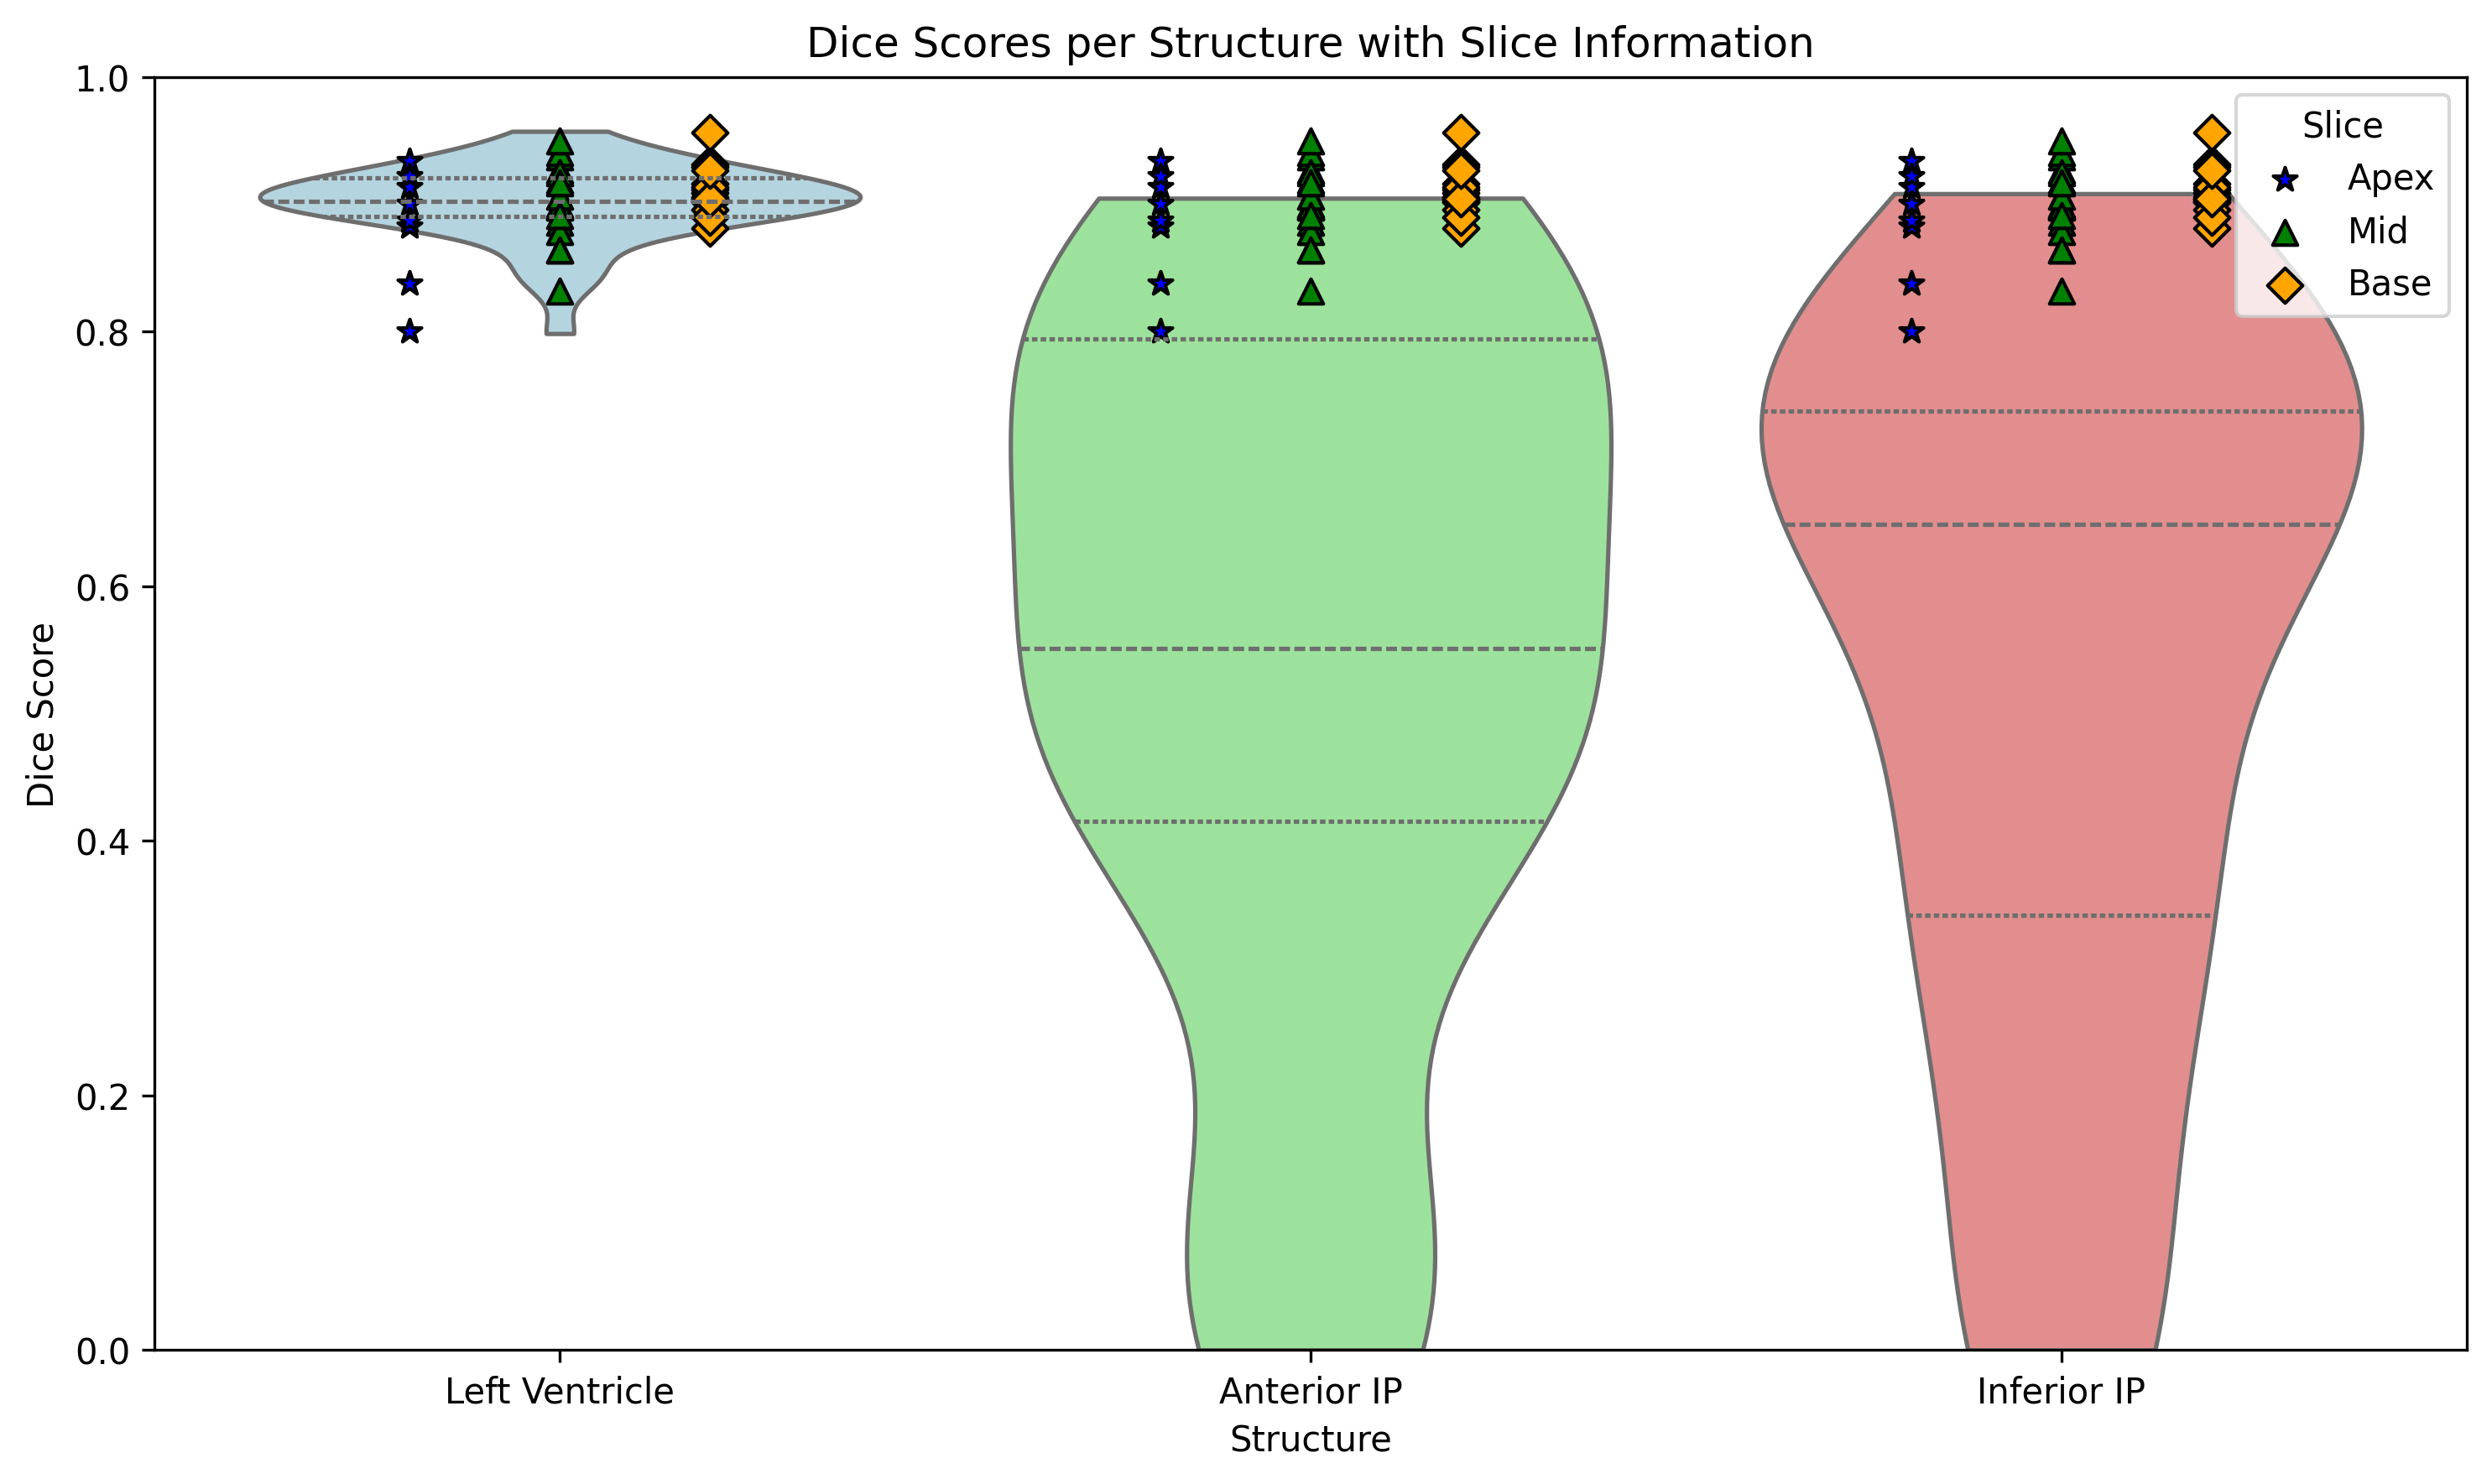

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load your data (adjust the CSV file path to the dataset you want to plot)
main=  '/Users/saschastocker/Documents/Stanford/work2024/WholeHeartCropISMRM/nnUNetResults'
csv_file_path = f'{main}/Run12/dice_scores_per_case.csv' 
df = pd.read_csv(csv_file_path)

# Ensure 'Label' column is of type string
df['Label'] = df['Label'].astype(str)

# Extract 'Slice Number' from 'Case ID'
def extract_slice_number(case_id):
    # Assuming 'Case ID' format: 'Le_Volunteer_01_DiVO_06_10_slice_002'
    parts = case_id.split('_')
    return parts[-1]  # Extracts '002'

df['Slice Number'] = df['Case ID'].apply(extract_slice_number)

# Map 'Slice Number' to 'Slice Name'
slice_name_mapping = {
    '001': 'Apex',
    '002': 'Mid',
    '003': 'Base'
}

# Ensure 'Slice Number' has leading zeros
df['Slice Number'] = df['Slice Number'].astype(str).str.zfill(3)
df['Slice Name'] = df['Slice Number'].map(slice_name_mapping)

# Map 'Label' codes to readable names
label_name_mapping = {
    'Label 1': 'Left Ventricle',
    'Label 2': 'Anterior IP',
    'Label 3': 'Inferior IP'
}

df['Structure'] = df['Label'].map(label_name_mapping)

# Define your marker, offset, and color mappings for slices
marker_mapping = {
    'Apex': '*',   # Star for Apex
    'Mid': '^',    # Triangle up for Mid
    'Base': 'D'    # Diamond for Base
}

offset_mapping = {
    'Apex': -0.2,
    'Mid': 0,
    'Base': 0.2
}

slice_color_mapping = {
    'Apex': 'blue',
    'Mid': 'green',
    'Base': 'orange'
}

# Define colors for violin plots (structures)
violin_color_mapping = {
    'Left Ventricle': 'lightblue',
    'Anterior IP': 'lightgreen',
    'Inferior IP': 'lightcoral'
}

# Set up the plot
plt.figure(figsize=(10, 6), dpi=300)
plt.title('Dice Scores per Structure with Slice Information')

# Create the violin plot with quartile lines and regions
structures = ['Left Ventricle', 'Anterior IP', 'Inferior IP']
violin_colors = [violin_color_mapping[structure] for structure in structures]
sns.violinplot(
    x='Structure',
    y='Dice Score',
    data=df,
    order=structures,
    palette=violin_colors,
    cut=0,
    inner='quartile'  # Add quartile lines and regions
)

# Overlay individual data points with slice-specific markers and offsets
for idx, structure in enumerate(structures):
    df_structure = df[df['Structure'] == structure]
    x_position = idx  # x-position for this structure
    for slice_name in ['Apex', 'Mid', 'Base']:
        df_slice = df_structure[df_structure['Slice Name'] == slice_name]
        if not df_slice.empty:
            x_vals = np.full(len(df_slice), x_position + offset_mapping[slice_name])
            plt.scatter(
                x_vals,
                df_slice.get('Dice Score Original Label 1', 'Column Not Found'),
                marker=marker_mapping[slice_name],
                color=slice_color_mapping[slice_name],
                edgecolor='black',
                s=50,
                label=slice_name if idx == 0 else ""  # Add label only once for the legend
            )

# Remove duplicate labels in the legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(
    by_label.values(),
    by_label.keys(),
    title='Slice',
    loc='upper right'
)

# Set labels and layout
plt.xlabel('Structure')
plt.ylabel('Dice Score')
plt.ylim(0, 1)  # Adjust based on your data range
plt.tight_layout()
plt.show()


/var/folders/9r/mlgf66555t98p7ptk_n0g21r0000gn/T/ipykernel_85264/4096429509.py:95: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


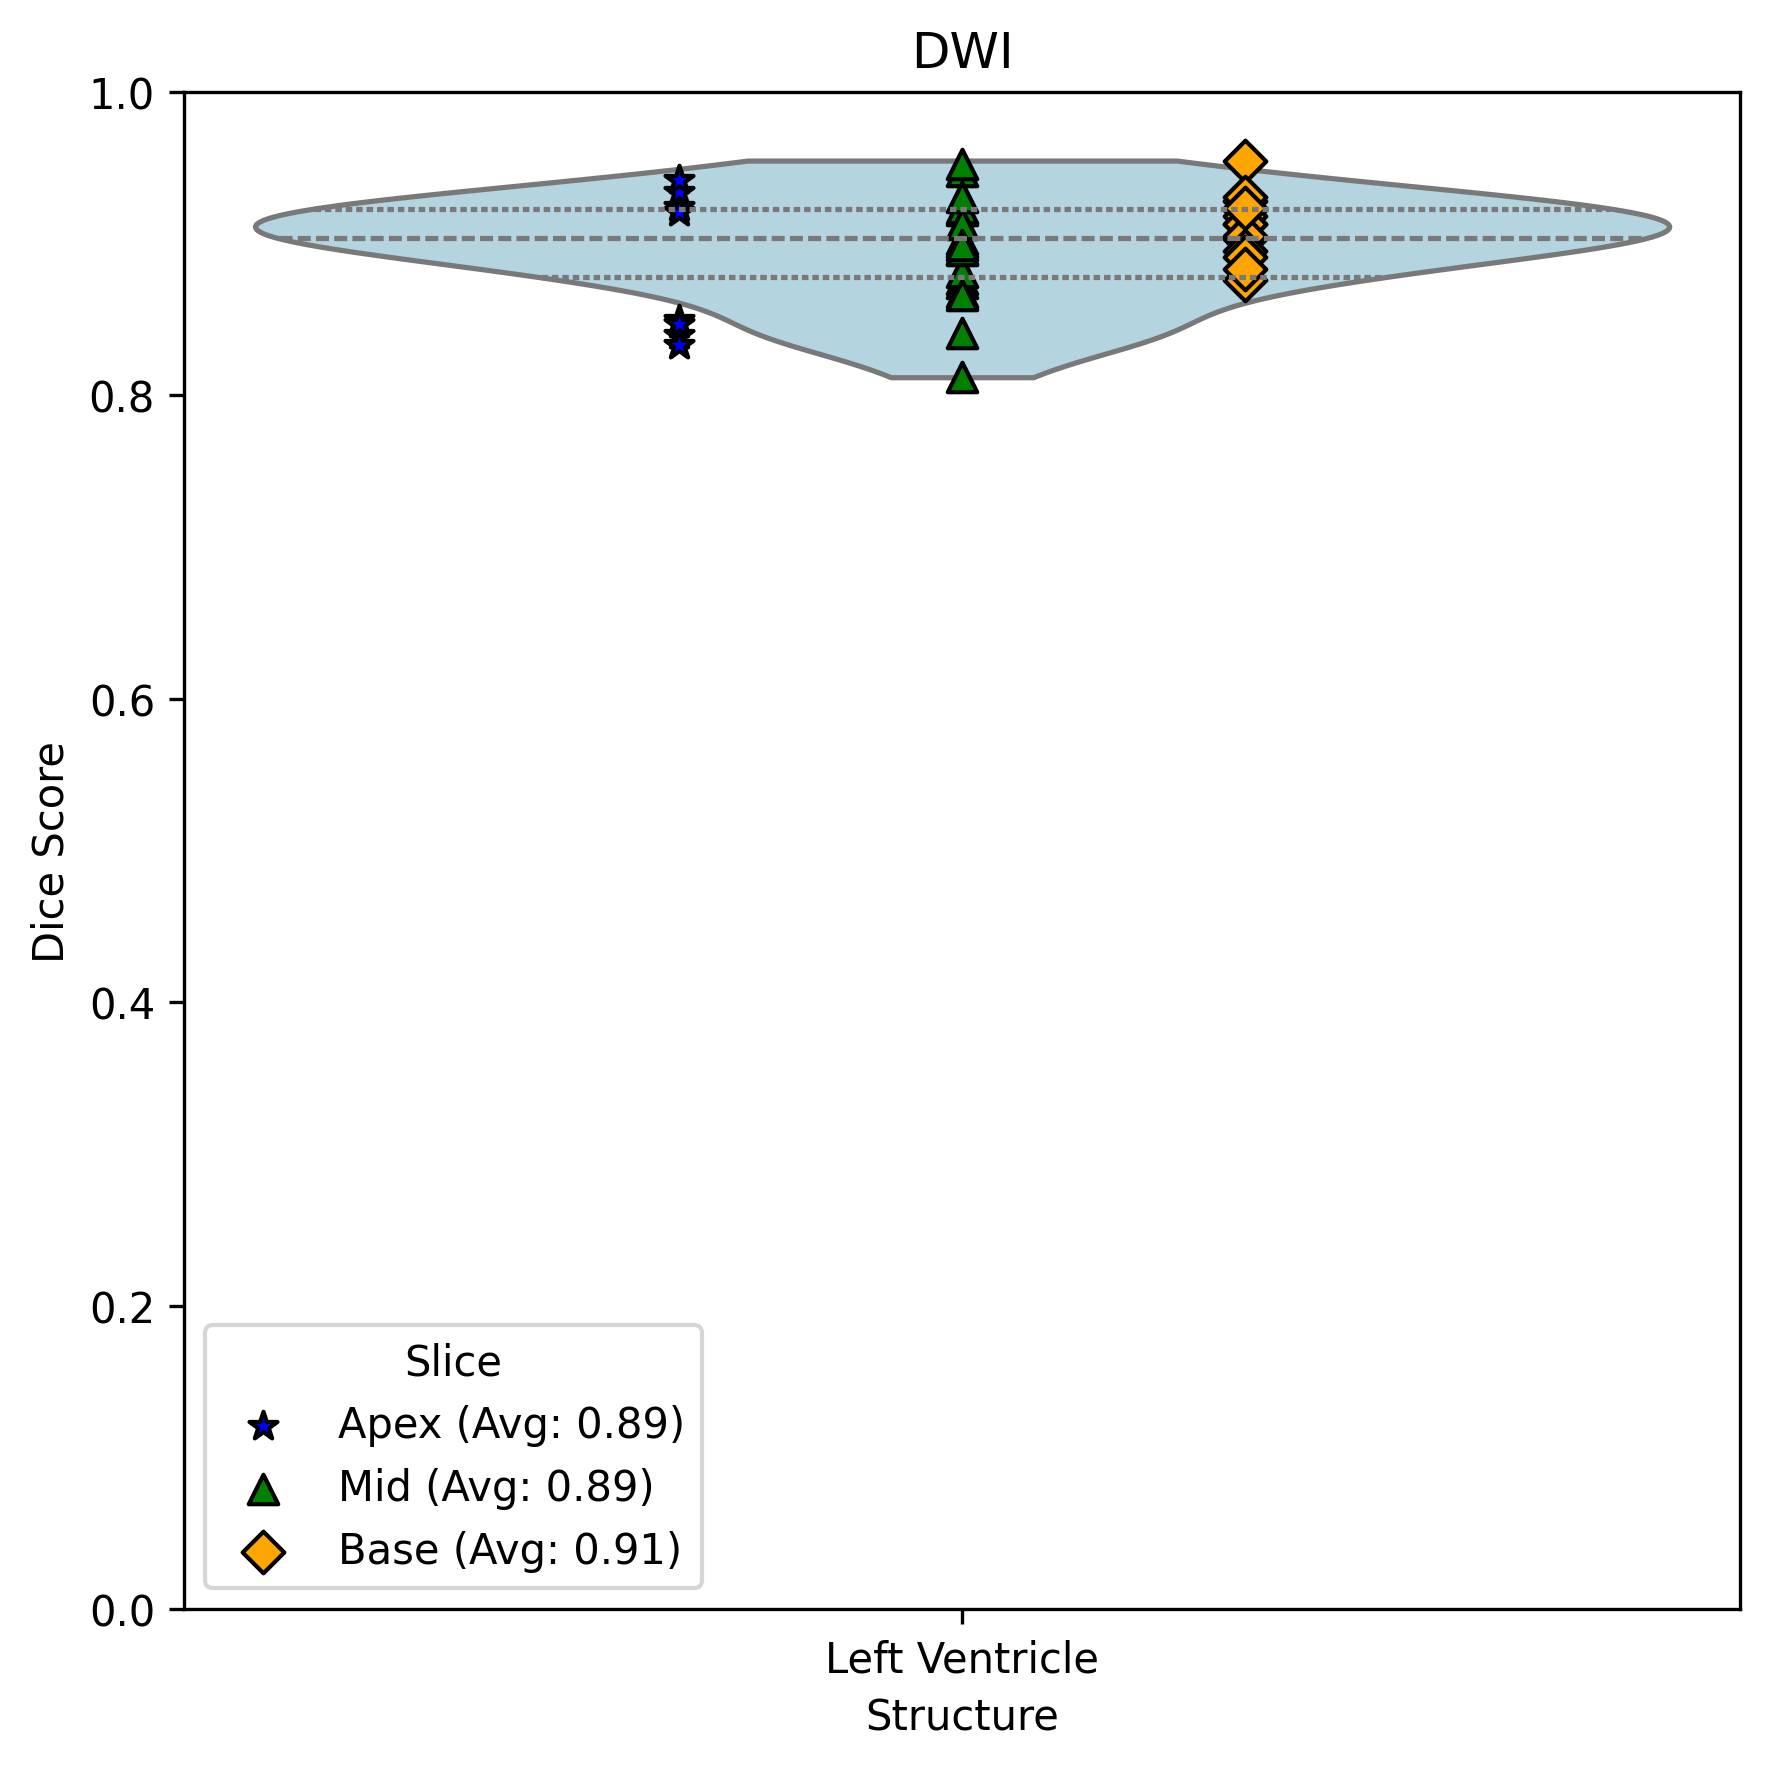

/var/folders/9r/mlgf66555t98p7ptk_n0g21r0000gn/T/ipykernel_85264/4096429509.py:95: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


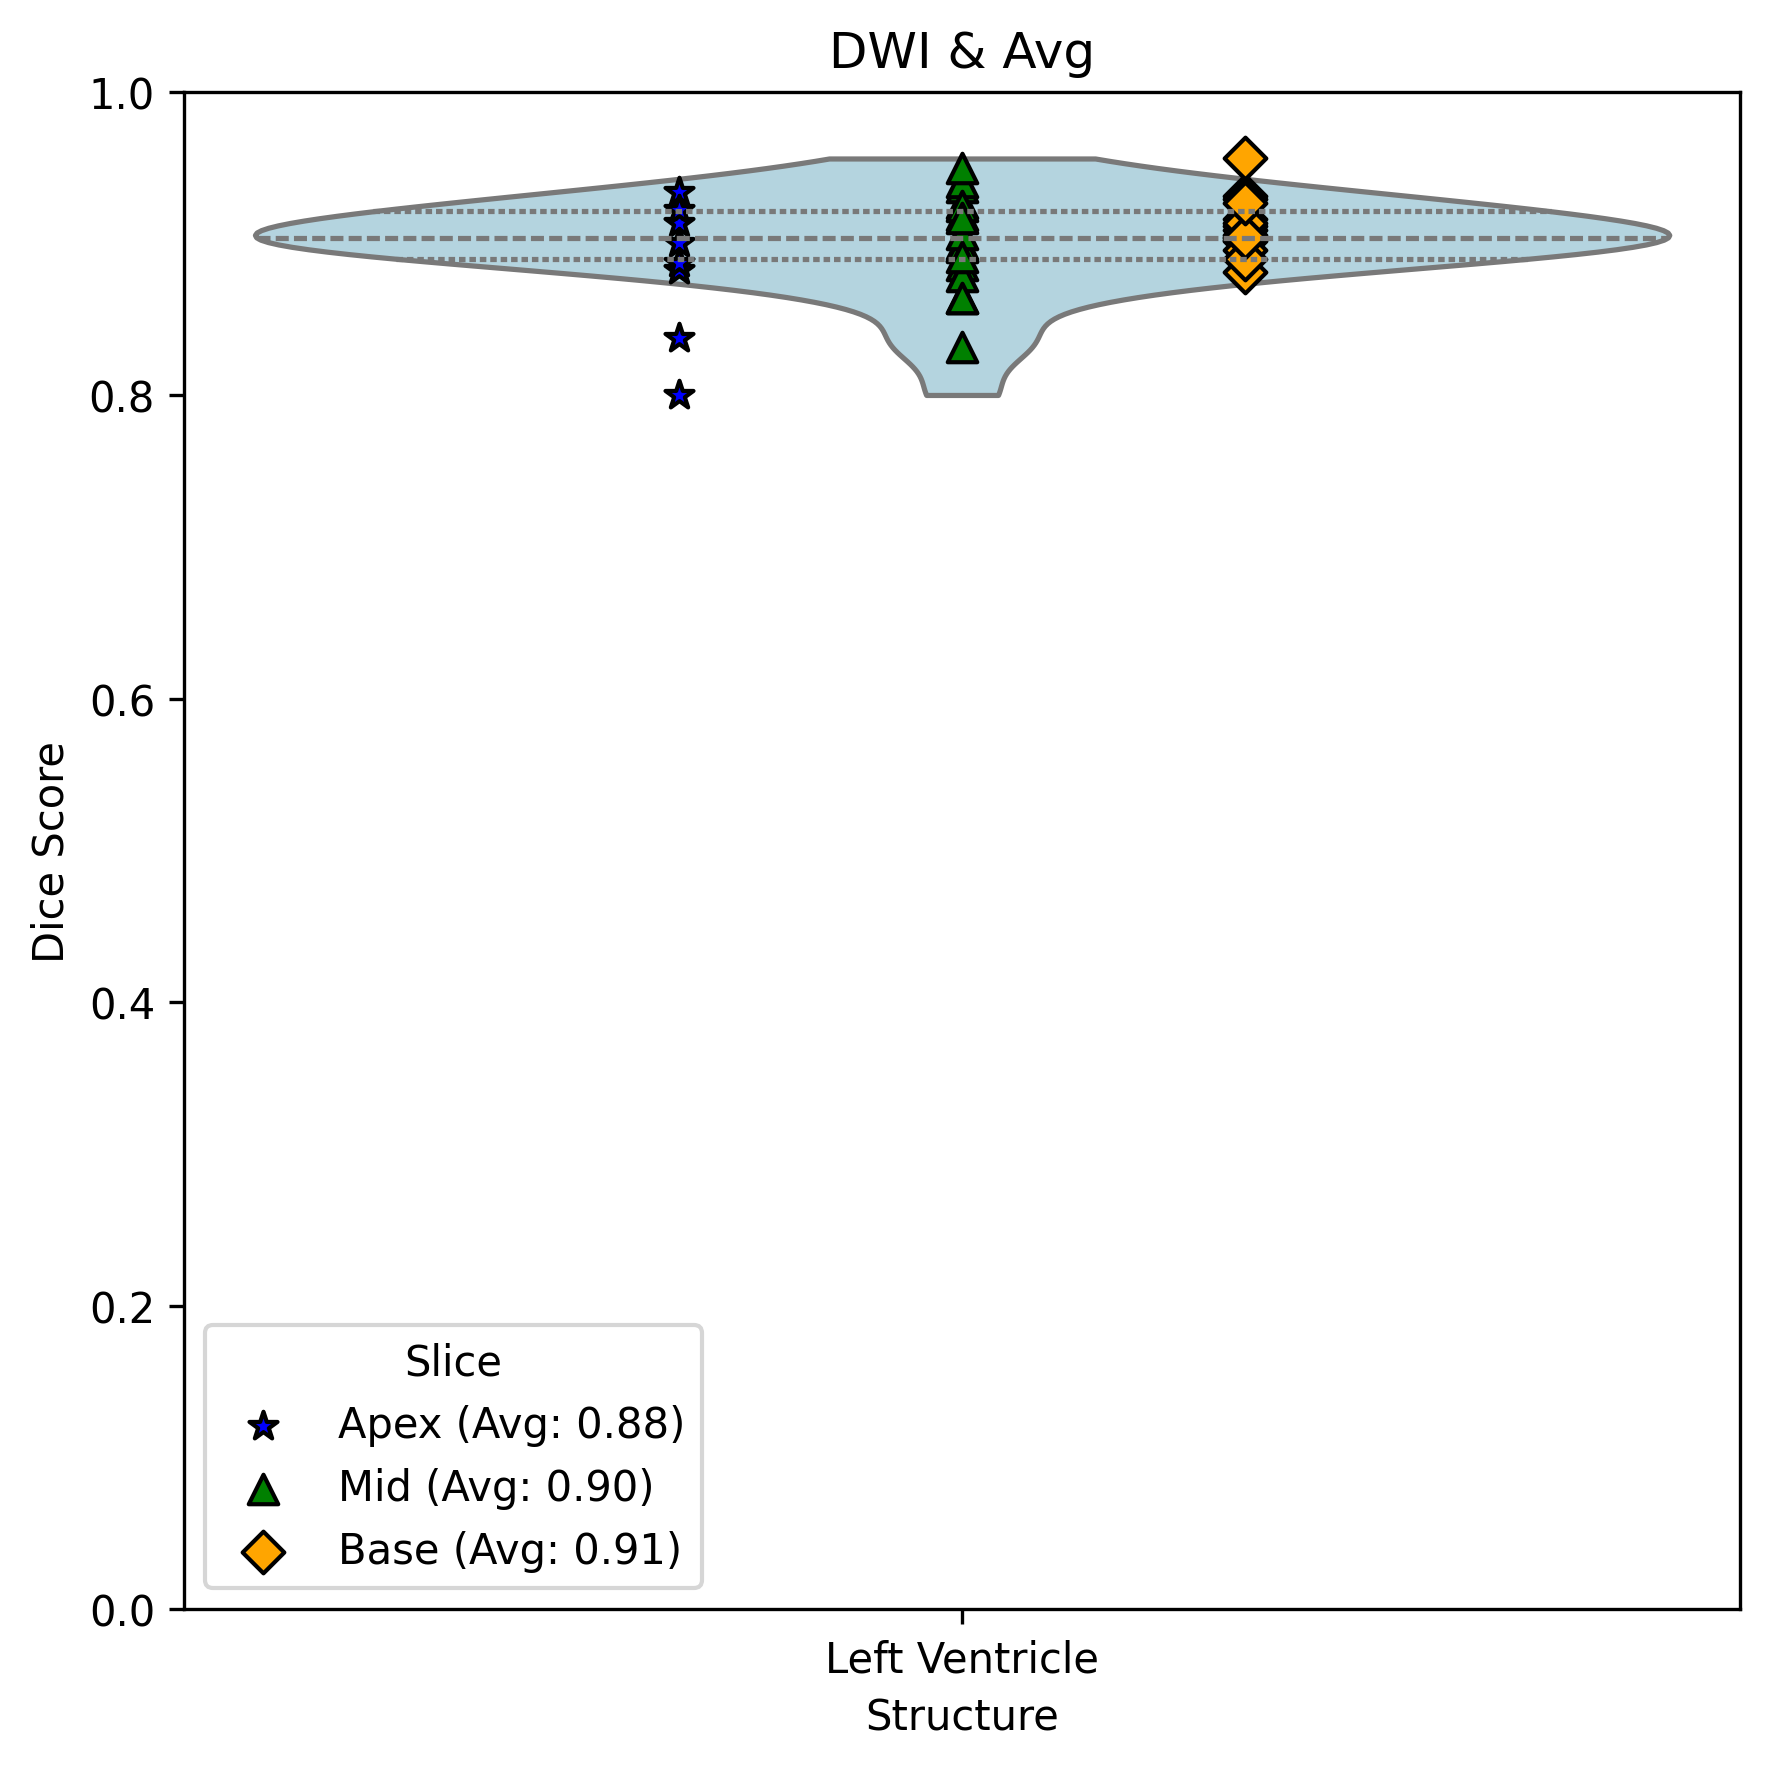

/var/folders/9r/mlgf66555t98p7ptk_n0g21r0000gn/T/ipykernel_85264/4096429509.py:95: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


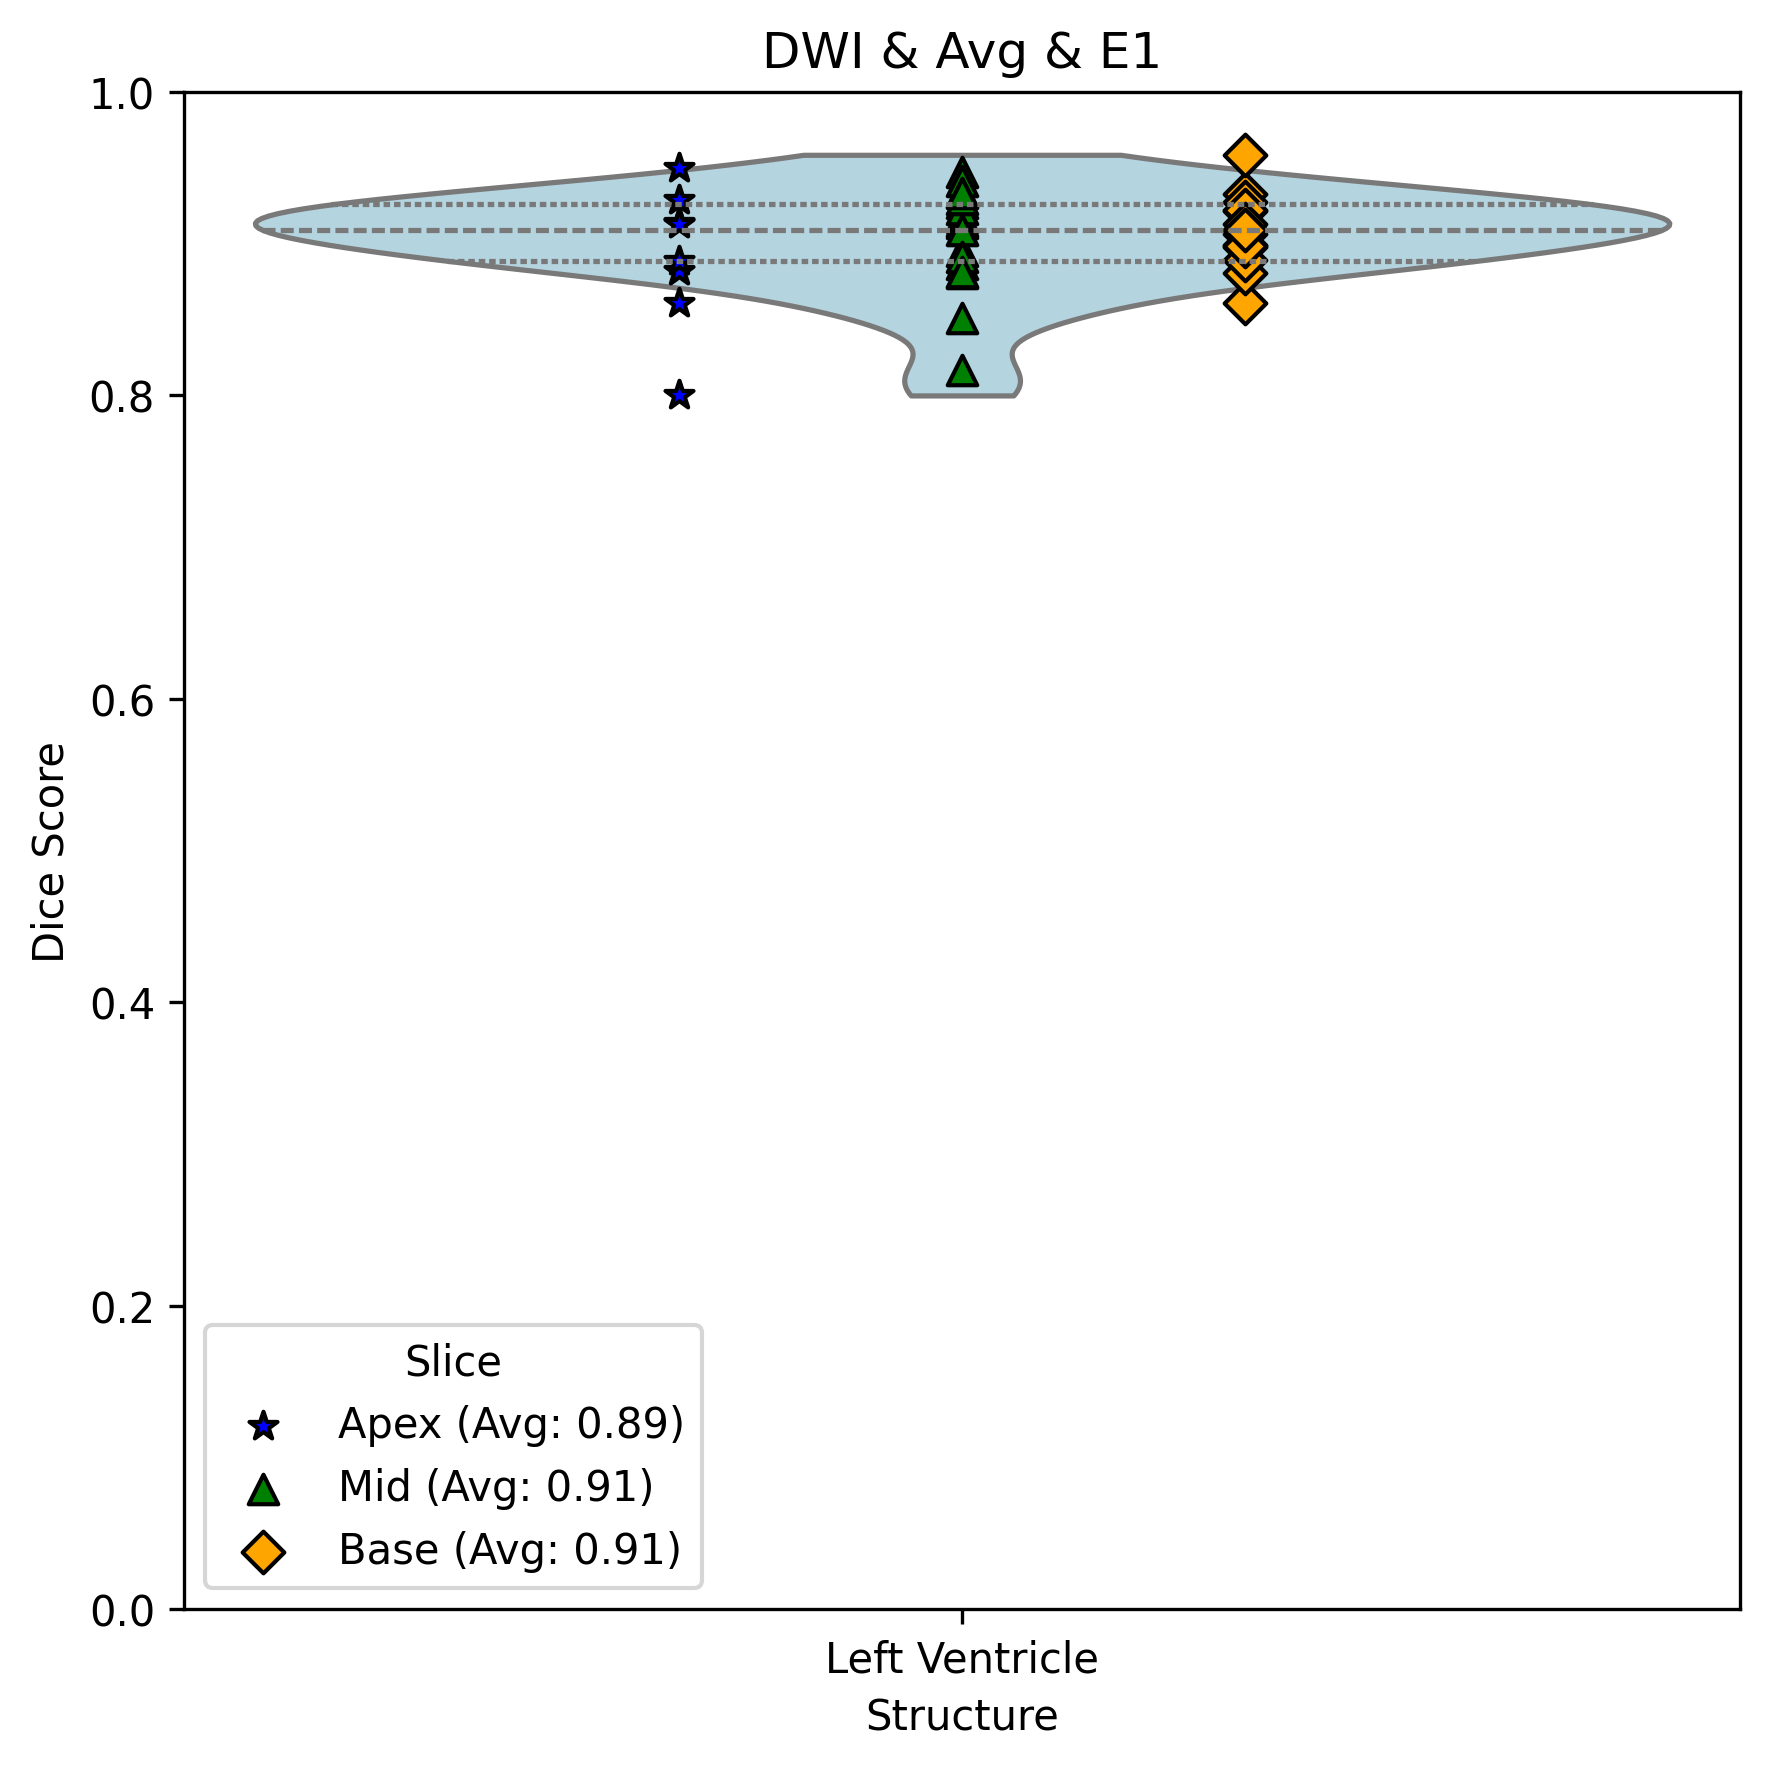

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D

# Load your data (adjust the CSV file path to the dataset you want to plot)
runs = ['11', '12', '13']

for run in runs:
    main = '/Users/saschastocker/Documents/Stanford/work2024/WholeHeartCropISMRM/nnUNetResults'
    csv_file_path = f'{main}/Run{run}/dice_scores_per_case.csv' 
    df = pd.read_csv(csv_file_path)

    # Ensure 'Label' column is of type string
    df['Label'] = df['Label'].astype(str)

    # Filter dataframe to only include 'Label 1'
    df = df[df['Label'] == 'Label 1']

    # Extract 'Slice Number' from 'Case ID'
    def extract_slice_number(case_id):
        # Assuming 'Case ID' format: 'Le_Volunteer_01_DiVO_06_10_slice_002'
        parts = case_id.split('_')
        return parts[-1]  # Extracts '002'

    df['Slice Number'] = df['Case ID'].apply(extract_slice_number)

    # Ensure 'Slice Number' has leading zeros
    df['Slice Number'] = df['Slice Number'].astype(str).str.zfill(3)

    # Map 'Slice Number' to 'Slice Name'
    slice_name_mapping = {
        '001': 'Apex',
        '002': 'Mid',
        '003': 'Base'
    }
    df['Slice Name'] = df['Slice Number'].map(slice_name_mapping)

    # Map 'Label' codes to readable names

    df['Structure'] = df['Label'].map(label_name_mapping)

    # Ensure that 'Dice Score' column exists
    if 'Dice Score Original Label 1' in df.columns:
            df['Dice Score'] = df['Dice Score Original Label 1']
    else:
        raise KeyError("Dice Score column not found in DataFrame")

    # Define your marker, offset, and color mappings for slices
    marker_mapping = {
        'Apex': '*',   # Star for Apex
        'Mid': '^',    # Triangle up for Mid
        'Base': 'D'    # Diamond for Base
    }

    offset_mapping = {
        'Apex': -0.1,
        'Mid': 0,
        'Base': 0.1
    }

    slice_color_mapping = {
        'Apex': 'blue',
        'Mid': 'green',
        'Base': 'orange'
    }

    # Define colors for violin plots (structures)
    violin_color_mapping = {
        'Left Ventricle': 'lightblue'
    }

    # Compute average Dice Scores per slice
    avg_scores = df.groupby('Slice Name')['Dice Score'].mean()
    avg_scores_dict = avg_scores.to_dict()

    # Compute overall average Dice Score
    overall_avg_score = df['Dice Score'].mean()

    # Set up the plot
    plt.figure(figsize=(6, 6), dpi=300)
    if(run =='11'):
         
        plt.title(f'DWI')
    elif(run == '12'):
         plt.title(f'DWI & Avg')
    elif(run == '13'):
         plt.title(f'DWI & Avg & E1')
    else:
         plt.tile('unsure which dataset')

    # Create the violin plot with quartile lines and regions
    structures = ['Left Ventricle']
    violin_colors = [violin_color_mapping[structure] for structure in structures]
    sns.violinplot(
        x='Structure',
        y='Dice Score',
        data=df,
        order=structures,
        palette=violin_colors,
        cut=0,
        inner='quartile', # Add quartile lines and regions
        width=0.5
    )

    # Overlay individual data points with slice-specific markers and offsets
    for idx, structure in enumerate(structures):
        df_structure = df[df['Structure'] == structure]
        x_position = idx  # x-position for this structure
        for slice_name in ['Apex', 'Mid', 'Base']:
            df_slice = df_structure[df_structure['Slice Name'] == slice_name]
            if not df_slice.empty:
                x_vals = np.full(len(df_slice), x_position + offset_mapping[slice_name])
                plt.scatter(
                    x_vals,
                    df_slice['Dice Score Original Label 1'],
                    marker=marker_mapping[slice_name],
                    color=slice_color_mapping[slice_name],
                    edgecolor='black',
                    s=50,
                    label=slice_name + f" (Avg: {avg_scores_dict[slice_name]:.2f})" if idx == 0 else ""
                )

    # Remove duplicate labels in the legend
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))

    plt.legend(
        by_label.values(),
        by_label.keys(),
        title='Slice',
        loc='lower left'
    )

    # Set labels and layout
    plt.ylabel('Dice Score')
    plt.ylim(0, 1)  # Adjust based on your data range
    plt.tight_layout()
    plt.show()


/var/folders/9r/mlgf66555t98p7ptk_n0g21r0000gn/T/ipykernel_85264/3212166747.py:92: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


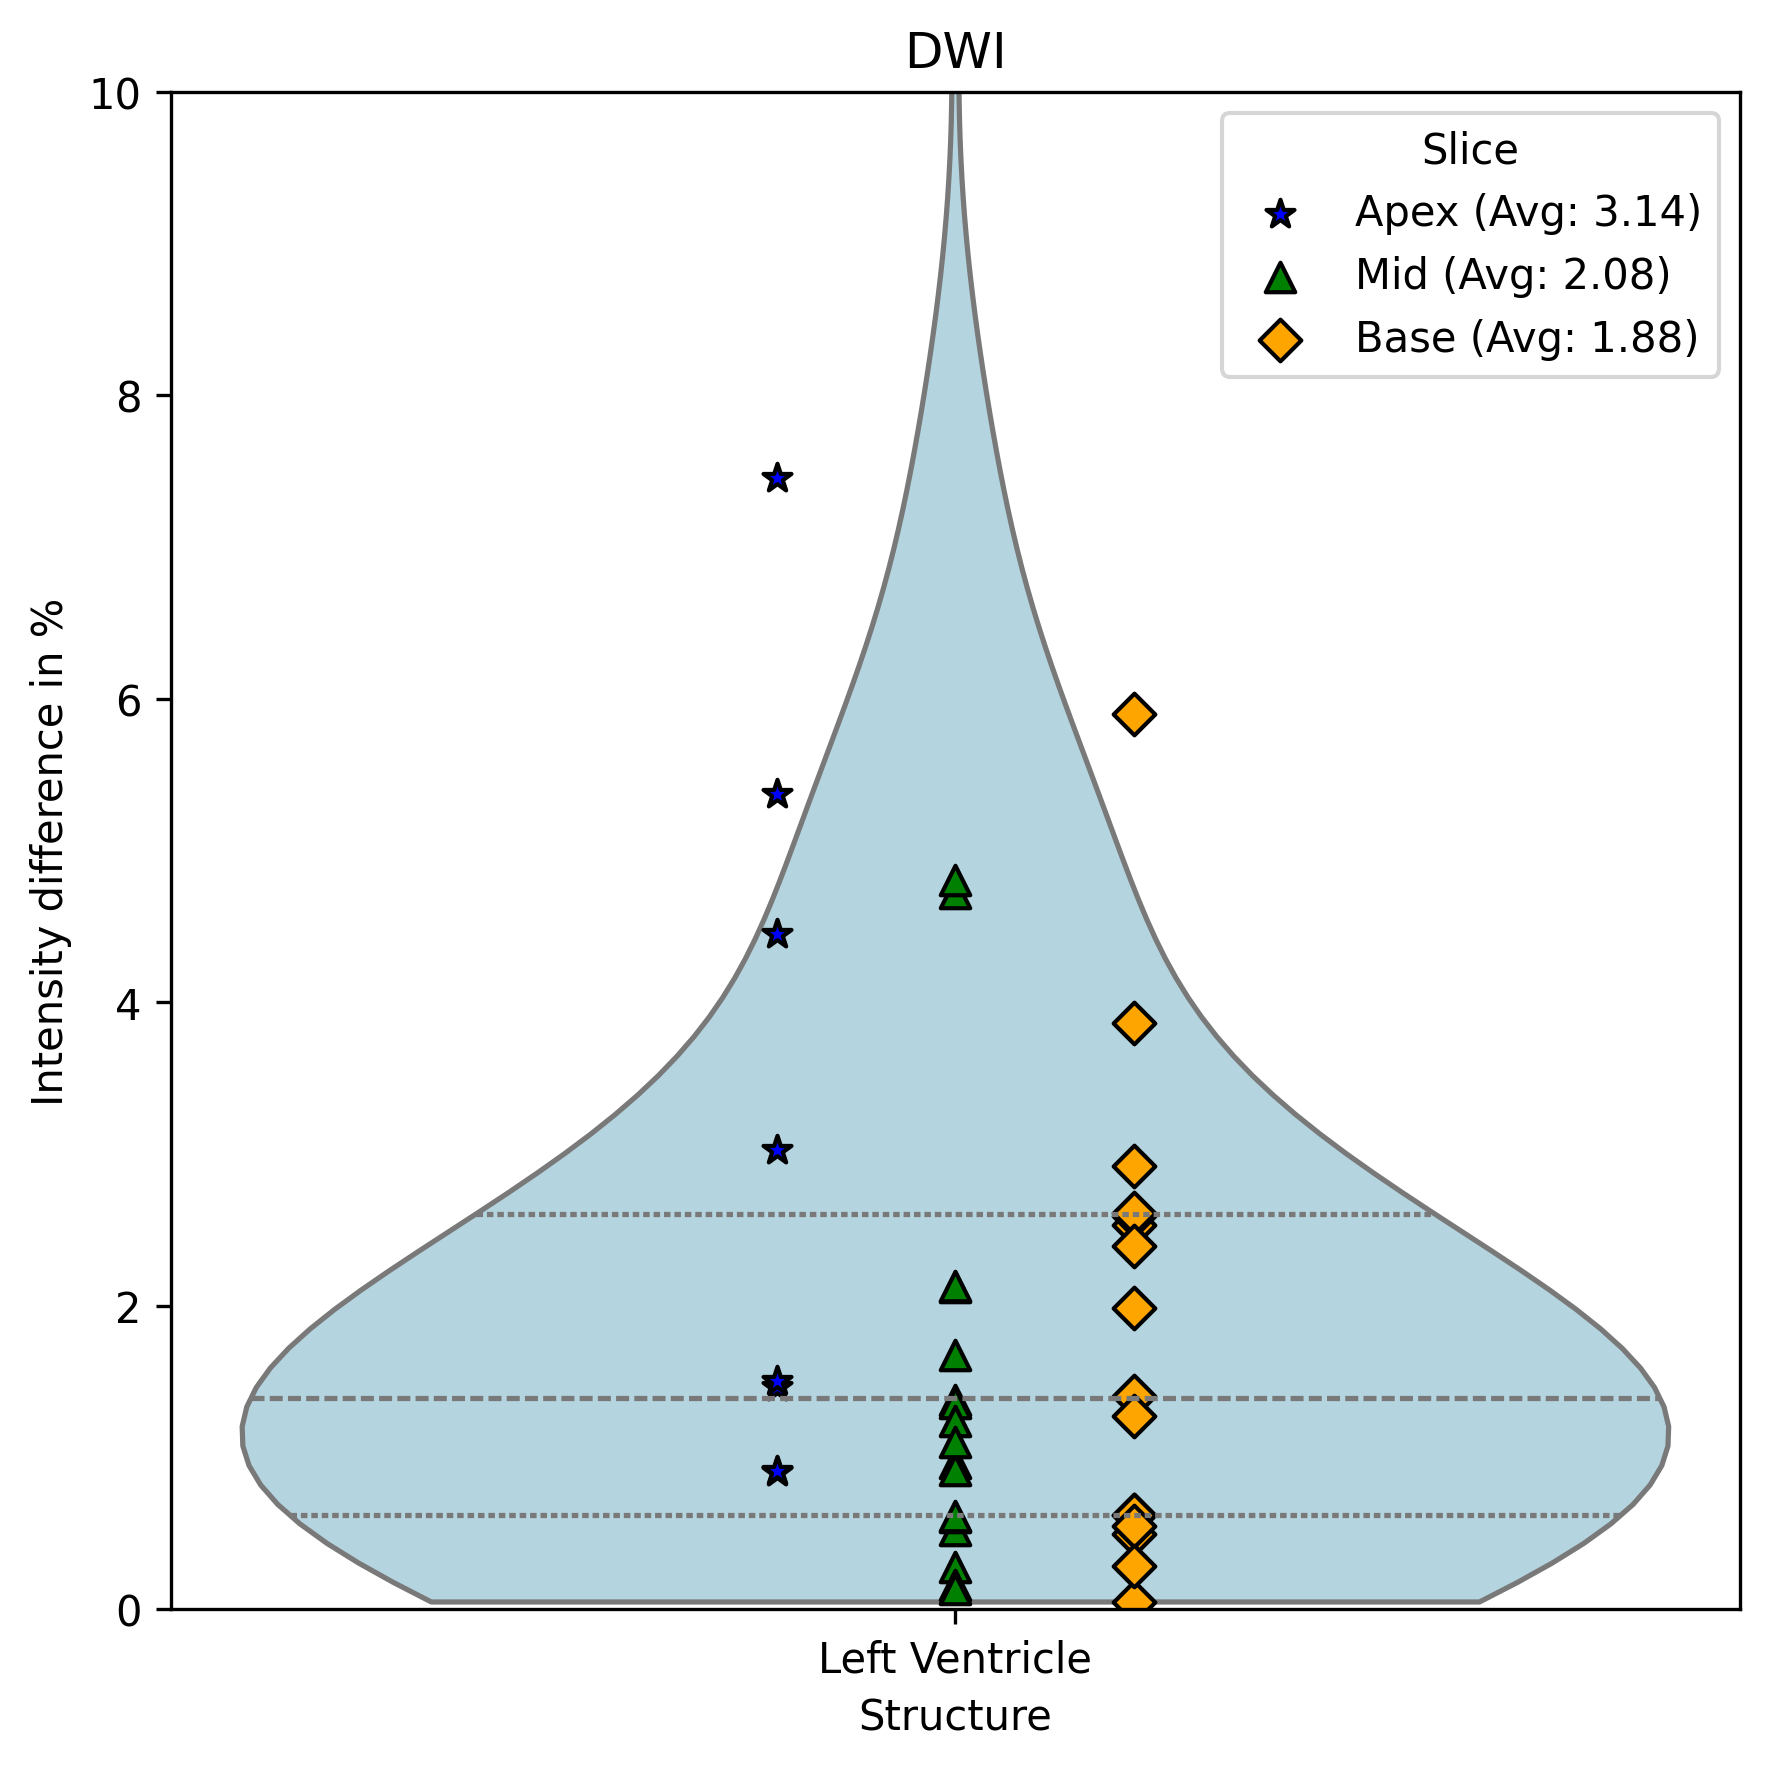

/var/folders/9r/mlgf66555t98p7ptk_n0g21r0000gn/T/ipykernel_85264/3212166747.py:92: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


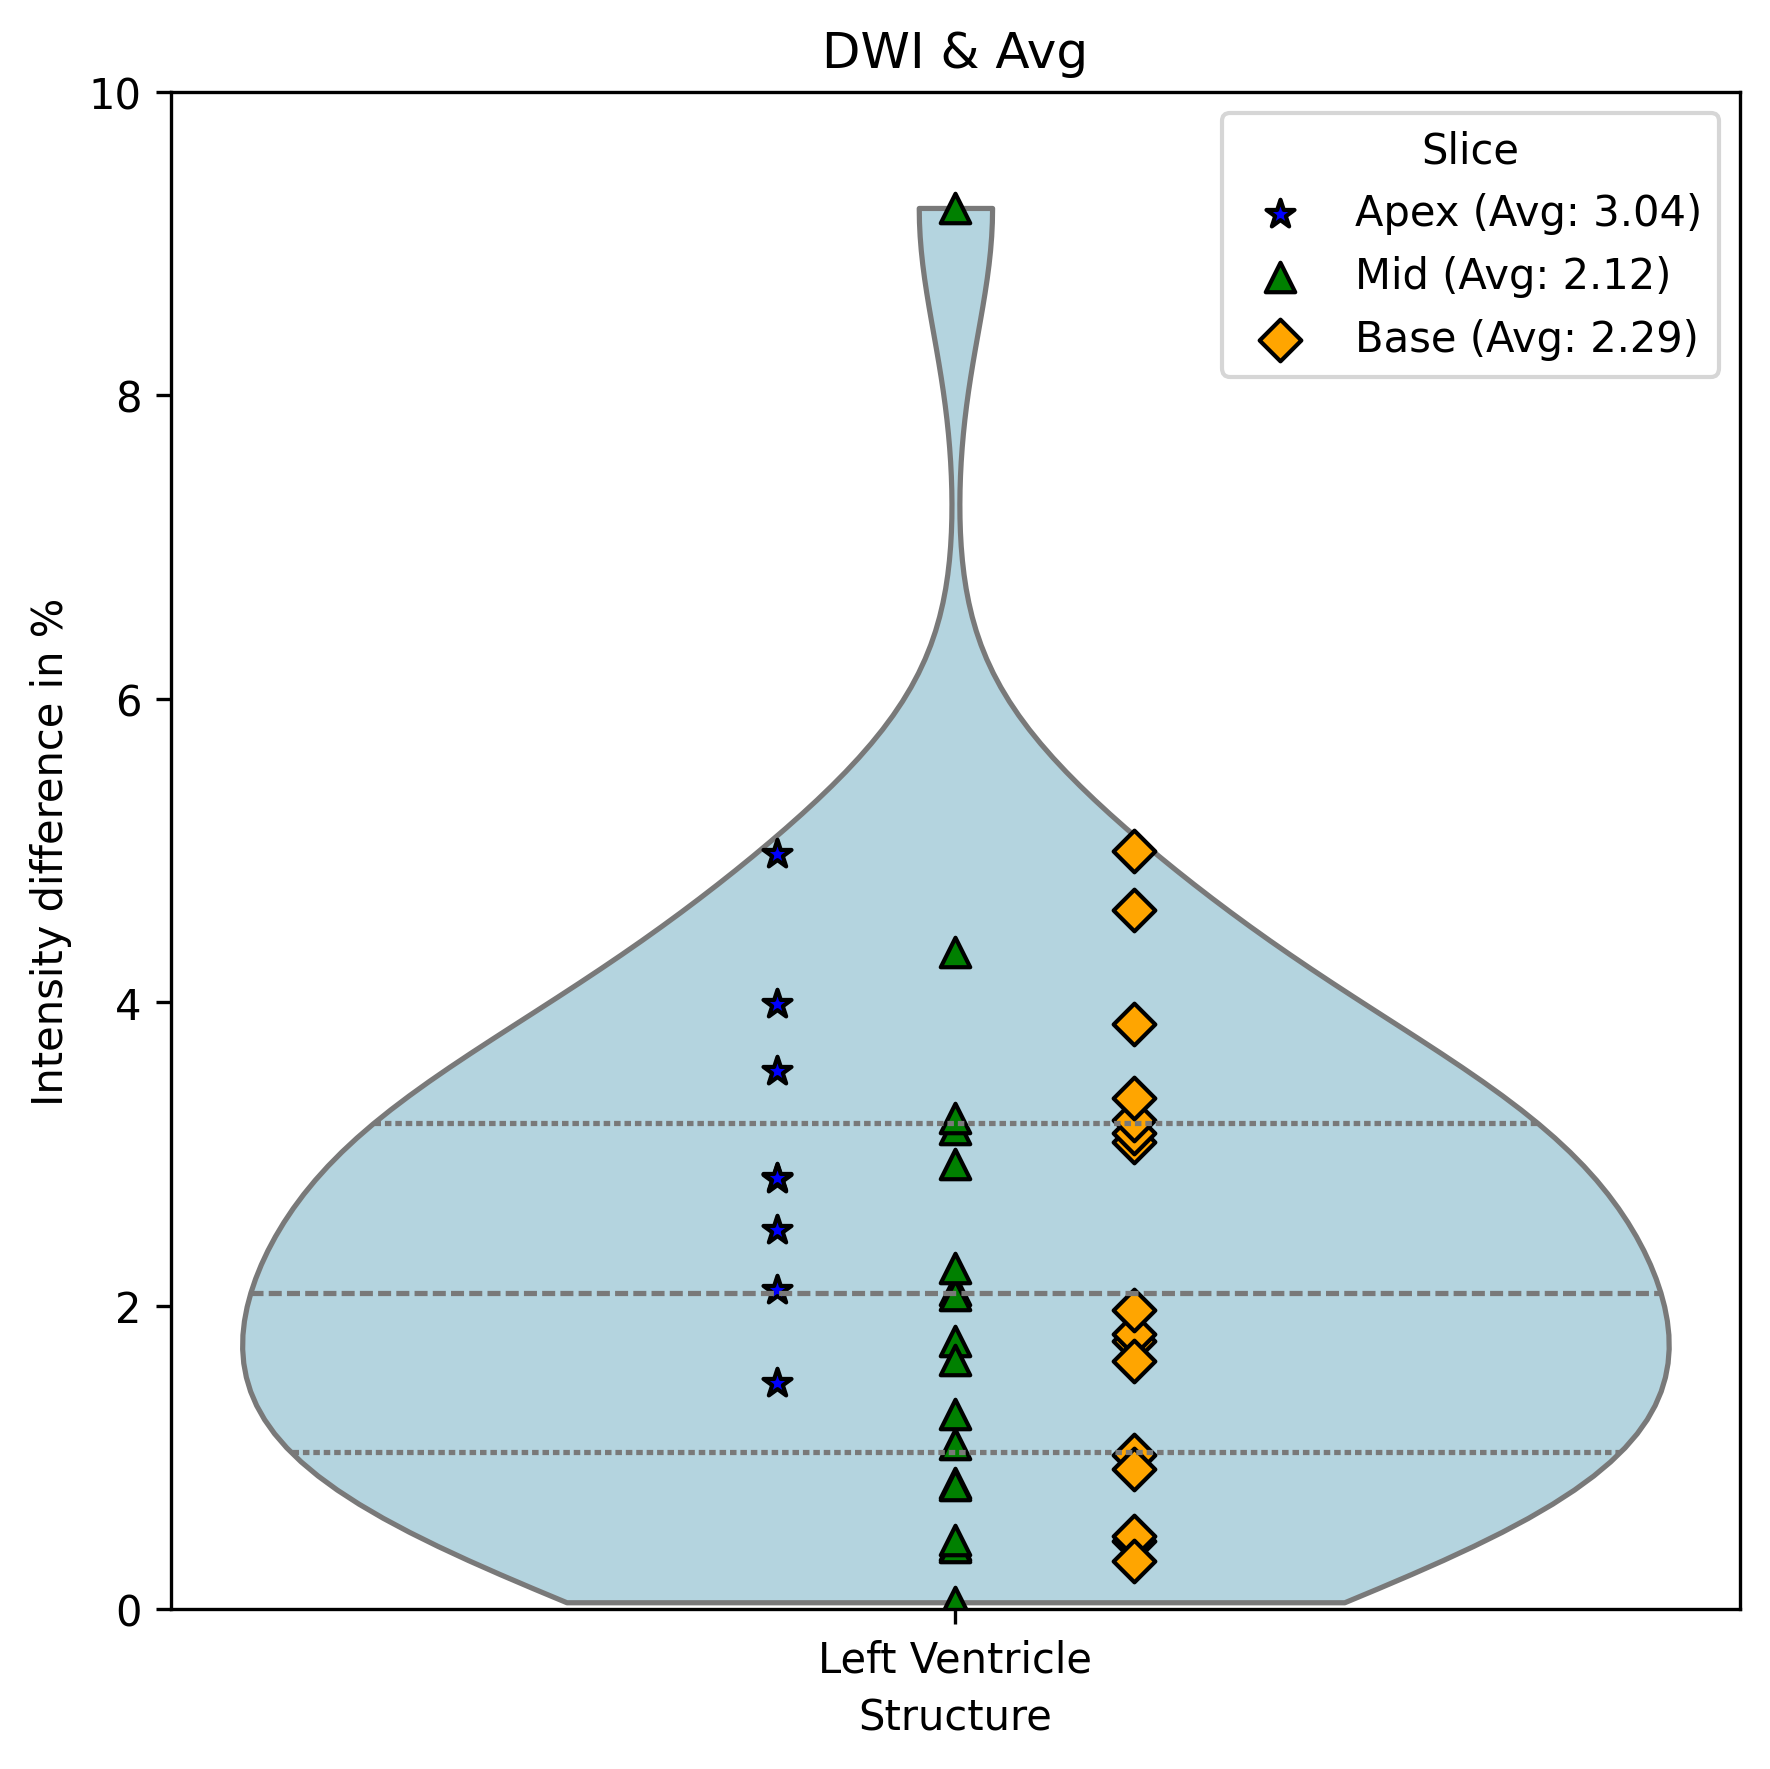

FileNotFoundError: [Errno 2] No such file or directory: '/Users/saschastocker/Documents/Stanford/work2024/WholeHeartCropISMRM/nnUNetResults/Run13/dice_scores_per_case.csv'

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D

# Load your data (adjust the CSV file path to the dataset you want to plot)
runs = ['11', '12', '13']

for run in runs:
    main = '/Users/saschastocker/Documents/Stanford/work2024/WholeHeartCropISMRM/nnUNetResults'
    csv_file_path = f'{main}/Run{run}/dice_scores_per_case.csv' 
    df = pd.read_csv(csv_file_path)

    # Ensure 'Label' column is of type string
    df['Label'] = df['Label'].astype(str)

    # Filter dataframe to only include 'Label 1'
    df = df[df['Label'] == 'Label 1']

    # Extract 'Slice Number' from 'Case ID'
    def extract_slice_number(case_id):
        # Assuming 'Case ID' format: 'Le_Volunteer_01_DiVO_06_10_slice_002'
        parts = case_id.split('_')
        return parts[-1]  # Extracts '002'

    df['Slice Number'] = df['Case ID'].apply(extract_slice_number)

    # Ensure 'Slice Number' has leading zeros
    df['Slice Number'] = df['Slice Number'].astype(str).str.zfill(3)

    # Map 'Slice Number' to 'Slice Name'
    slice_name_mapping = {
        '001': 'Apex',
        '002': 'Mid',
        '003': 'Base'
    }
    df['Slice Name'] = df['Slice Number'].map(slice_name_mapping)

    # Map 'Label' codes to readable names
    label_name_mapping = {
        'Label 1': 'Left Ventricle'
    }
    df['Structure'] = df['Label'].map(label_name_mapping)


    # Define your marker, offset, and color mappings for slices
    marker_mapping = {
        'Apex': '*',   # Star for Apex
        'Mid': '^',    # Triangle up for Mid
        'Base': 'D'    # Diamond for Base
    }

    offset_mapping = {
        'Apex': -0.1,
        'Mid': 0,
        'Base': 0.1
    }

    slice_color_mapping = {
        'Apex': 'blue',
        'Mid': 'green',
        'Base': 'orange'
    }

    # Define colors for violin plots (structures)
    violin_color_mapping = {
        'Left Ventricle': 'lightblue'
    }

    # Compute average Dice Scores per slice
    avg_scores = df.groupby('Slice Name')['Mean Percentage Difference Label 1'].mean()
    avg_scores_dict = avg_scores.to_dict()

    # Compute overall average Dice Score

    # Set up the plot
    plt.figure(figsize=(6, 6), dpi=300)
    if(run =='11'):
         
        plt.title(f'DWI')
    elif(run == '12'):
         plt.title(f'DWI & Avg')
    elif(run == '13'):
         plt.title(f'DWI & Avg & E1')
    else:
         plt.tile('unsure which dataset')

    # Create the violin plot with quartile lines and regions
    structures = ['Left Ventricle']
    violin_colors = [violin_color_mapping[structure] for structure in structures]
    sns.violinplot(
        x='Structure',
        y='Mean Percentage Difference Label 1',
        data=df,
        order=structures,
        palette=violin_colors,
        cut=0,
        inner='quartile'  # Add quartile lines and regions
    )

    # Overlay individual data points with slice-specific markers and offsets
    for idx, structure in enumerate(structures):
        df_structure = df[df['Structure'] == structure]
        x_position = idx  # x-position for this structure
        for slice_name in ['Apex', 'Mid', 'Base']:
            df_slice = df_structure[df_structure['Slice Name'] == slice_name]
            if not df_slice.empty:
                x_vals = np.full(len(df_slice), x_position + offset_mapping[slice_name])
                plt.scatter(
                    x_vals,
                    df_slice['Mean Percentage Difference Label 1'],
                    marker=marker_mapping[slice_name],
                    color=slice_color_mapping[slice_name],
                    edgecolor='black',
                    s=50,
                    label=slice_name + f" (Avg: {avg_scores_dict[slice_name]:.2f})" if idx == 0 else ""
                )

    # Remove duplicate labels in the legend
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))

    plt.legend(
        by_label.values(),
        by_label.keys(),
        title='Slice',
        loc='upper right'
    )

    # Set labels and layout
    plt.ylabel('Intensity difference in %')
    plt.ylim(0, 10)  # Adjust based on your data range
    plt.tight_layout()
    plt.show()


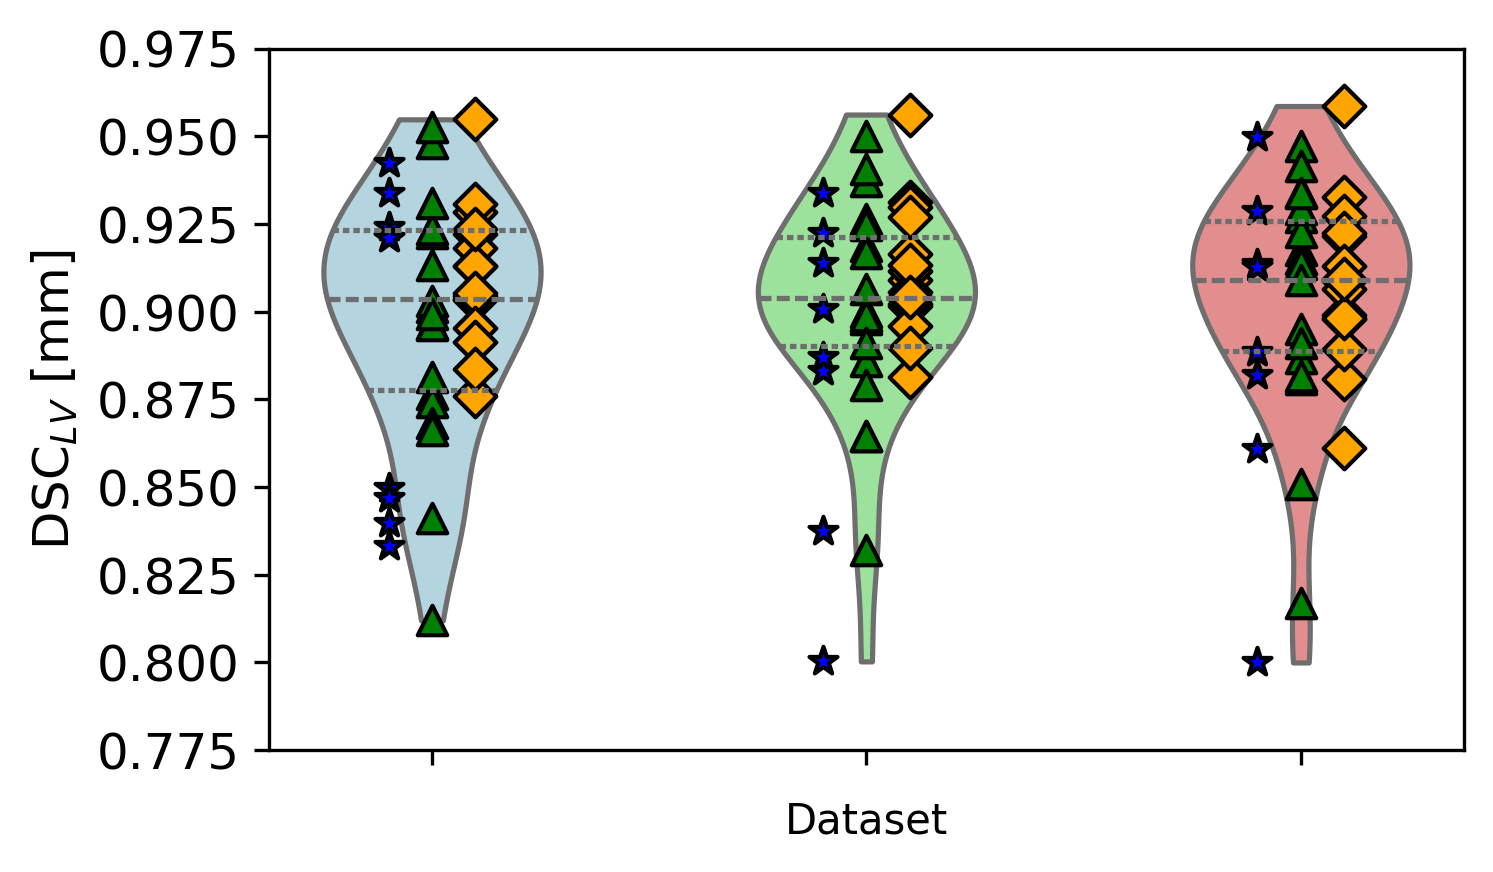

In [103]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D

# Load all runs into a single DataFrame with an added column for each run
runs = ['11', '12', '13']
run_titles = {'11': 'DWI', '12': 'DWI & MD', '13': 'DWI & MD & E1'}

all_data = []

for run in runs:
    main = '/Users/saschastocker/Documents/Stanford/work2024/WholeHeartCropISMRM/nnUNetResults'
    csv_file_path = f'{main}/Run{run}/dice_scores_per_case.csv'
    df = pd.read_csv(csv_file_path)

    # Ensure 'Label' column is of type string
    df['Label'] = df['Label'].astype(str)

    # Filter dataframe to only include 'Label 1'
    df = df[df['Label'] == 'Label 1']

    # Extract 'Slice Number' from 'Case ID'
    def extract_slice_number(case_id):
        # Assuming 'Case ID' format: 'Le_Volunteer_01_DiVO_06_10_slice_002'
        parts = case_id.split('_')
        return parts[-1]  # Extracts '002'

    df['Slice Number'] = df['Case ID'].apply(extract_slice_number)

    # Ensure 'Slice Number' has leading zeros
    df['Slice Number'] = df['Slice Number'].astype(str).str.zfill(3)

    # Map 'Slice Number' to 'Slice Name'
    slice_name_mapping = {
        '001': 'Apex',
        '002': 'Mid',
        '003': 'Base'
    }
    df['Slice Name'] = df['Slice Number'].map(slice_name_mapping)

    # Map 'Label' codes to readable names
    # label_name_mapping = {
    #     'Label 1': 'Left Ventricle'
    # }
    # df['Structure'] = df['Label'].map(label_name_mapping)

    # Ensure that 'Dice Score' column exists
    if 'Dice Score Original Label 1' in df.columns:
        df['Dice Score'] = df['Dice Score Original Label 1']
    else:
        raise KeyError("Dice Score column not found in DataFrame")

    # Add a new column to identify the run
    df['Dataset'] = run_titles[run]

    # Append to the list
    all_data.append(df)

# Combine all runs into a single DataFrame
combined_df = pd.concat(all_data, ignore_index=True)

# Define marker, offset, and color mappings for slices
marker_mapping = {
    'Apex': '*',   # Star for Apex
    'Mid': '^',    # Triangle up for Mid
    'Base': 'D'    # Diamond for Base
}

offset_mapping = {
    'Apex': -0.1,
    'Mid': 0,
    'Base': 0.1
}

slice_color_mapping = {
    'Apex': 'blue',
    'Mid': 'green',
    'Base': 'orange'
}

# Define colors for violin plots (structures)
dataset_palette = {
    'DWI': 'lightblue',
    'DWI & MD': 'lightgreen',
    'DWI & MD & E1': 'lightcoral'
}

# Set up the plot
plt.figure(figsize=(5, 3), dpi=300)
plt.title('', fontsize = 0)

# Create the violin plot with quartile lines and regions for each dataset
sns.violinplot(
    x='Dataset',
    y='Dice Score',
    hue='Dataset',  
    data=combined_df,
    palette=dataset_palette,
    cut=0,
    inner='quartile',  # Add quartile lines and regions
    width=0.5,
)

# Overlay individual data points with slice-specific markers and offsets
for idx, dataset in enumerate(combined_df['Dataset'].unique()):
    df_dataset = combined_df[combined_df['Dataset'] == dataset]
    x_position = idx  # x-position for this dataset
    for slice_name in ['Apex', 'Mid', 'Base']:
        df_slice = df_dataset[df_dataset['Slice Name'] == slice_name]
        if not df_slice.empty:
            x_vals = np.full(len(df_slice), x_position + offset_mapping[slice_name])
            plt.scatter(
                x_vals,
                df_slice['Dice Score Original Label 1'],
                marker=marker_mapping[slice_name],
                color=slice_color_mapping[slice_name],
                edgecolor='black',
                s=50,
                label=slice_name if idx == 0 else ""  # Add label only once for the legend
            )

# Remove duplicate labels in the legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))


xticks_labels = [' ',' ',' ']
xticks=[0,1,2]
plt.xticks(fontsize=0,ticks=xticks,labels=xticks_labels)
plt.ylabel(r'DSC$_{LV}$ [mm]', fontsize = '12')
plt.ylim(0.775,0.975)  # Adjust based on your data range
plt.tight_layout()
plt.yticks(fontsize=12)  
plt.show()

plt.show()

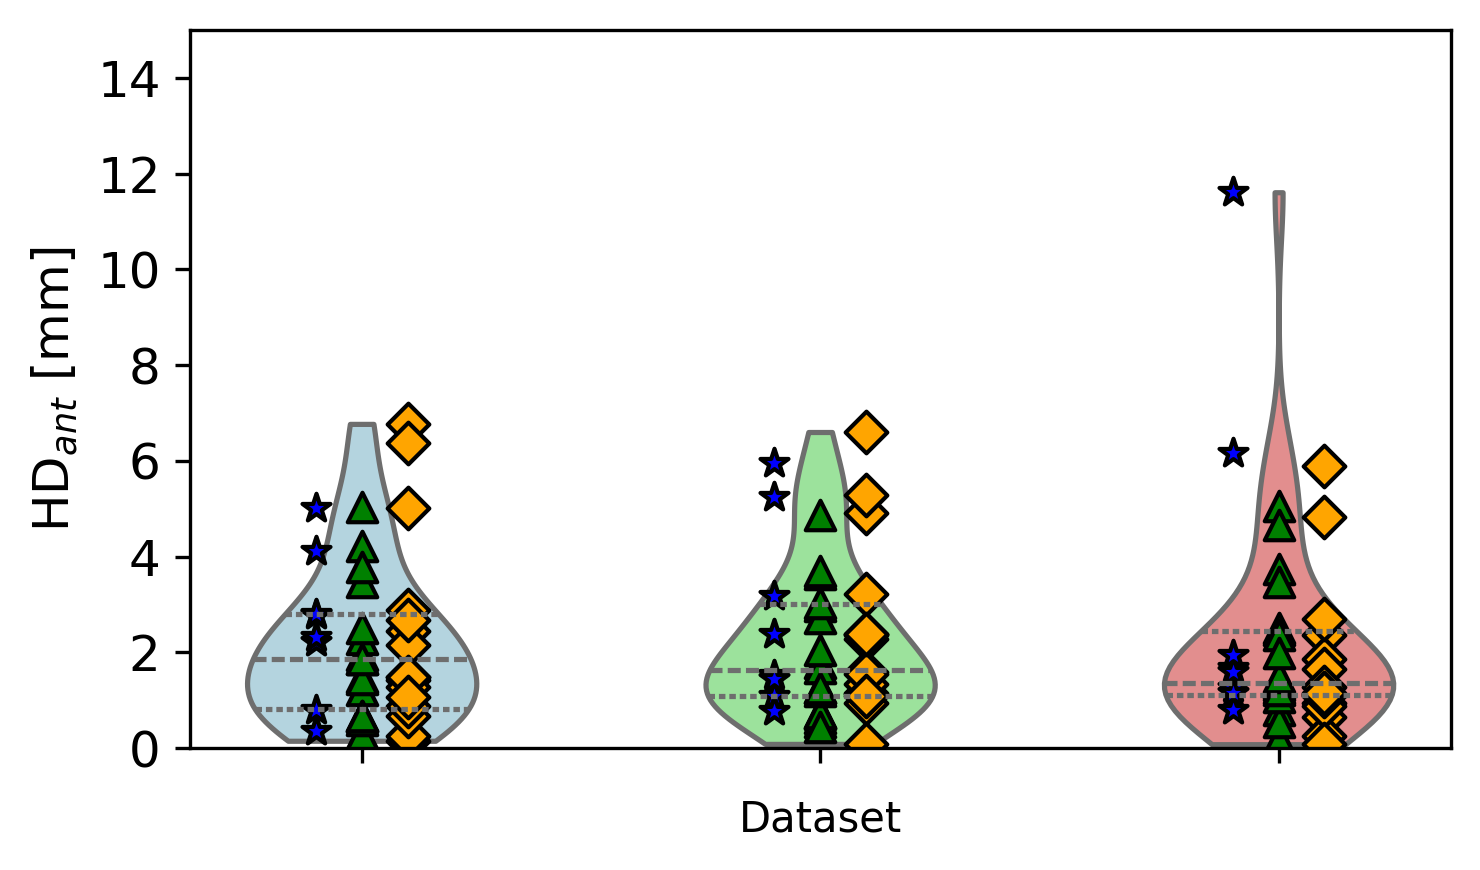

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D

# Load all runs into a single DataFrame with an added column for each run
runs = ['11', '12', '13']
run_titles = {'11': 'DWI', '12': 'DWI & MD', '13': 'DWI & MD & E1'}

all_data = []

for run in runs:
    main = '/Users/saschastocker/Documents/Stanford/work2024/WholeHeartCropISMRM/nnUNetResults'
    csv_file_path = f'{main}/Run{run}/dice_scores_per_case.csv'
    df = pd.read_csv(csv_file_path)

    # Ensure 'Label' column is of type string
    df['Label'] = df['Label'].astype(str)

    # Filter dataframe to only include 'Label 1'
    df = df[df['Label'] == 'Label 1']

    # Extract 'Slice Number' from 'Case ID'
    def extract_slice_number(case_id):
        # Assuming 'Case ID' format: 'Le_Volunteer_01_DiVO_06_10_slice_002'
        parts = case_id.split('_')
        return parts[-1]  # Extracts '002'

    df['Slice Number'] = df['Case ID'].apply(extract_slice_number)

    # Ensure 'Slice Number' has leading zeros
    df['Slice Number'] = df['Slice Number'].astype(str).str.zfill(3)

    # Map 'Slice Number' to 'Slice Name'
    slice_name_mapping = {
        '001': 'Apex',
        '002': 'Mid',
        '003': 'Base'
    }
    df['Slice Name'] = df['Slice Number'].map(slice_name_mapping)

    # Map 'Label' codes to readable names
    label_name_mapping = {
        'Label 1': 'Left Ventricle'
    }
    df['Structure'] = df['Label'].map(label_name_mapping)


    # Add a new column to identify the run
    df['Dataset'] = run_titles[run]

    # Append to the list
    all_data.append(df)

# Combine all runs into a single DataFrame
combined_df = pd.concat(all_data, ignore_index=True)

# Define marker, offset, and color mappings for slices
marker_mapping = {
    'Apex': '*',   # Star for Apex
    'Mid': '^',    # Triangle up for Mid
    'Base': 'D'    # Diamond for Base
}

offset_mapping = {
    'Apex': -0.1,
    'Mid': 0,
    'Base': 0.1
}

slice_color_mapping = {
    'Apex': 'blue',
    'Mid': 'green',
    'Base': 'orange'
}

# Define colors for violin plots (structures)
dataset_palette = {
    'DWI': 'lightblue',
    'DWI & MD': 'lightgreen',
    'DWI & MD & E1': 'lightcoral'
}

# Set up the plot
plt.figure(figsize=(5, 3), dpi=300)
plt.title('',fontsize =24)

# Create the violin plot with quartile lines and regions for each dataset
sns.violinplot(
    x='Dataset',
    y='Hausdorff Distance Label 2',
    hue='Dataset',  
    data=combined_df,
    palette=dataset_palette,
    cut=0,
    inner='quartile',  # Add quartile lines and regions
    width=0.5
)

# Overlay individual data points with slice-specific markers and offsets
for idx, dataset in enumerate(combined_df['Dataset'].unique()):
    df_dataset = combined_df[combined_df['Dataset'] == dataset]
    x_position = idx  # x-position for this dataset
    for slice_name in ['Apex', 'Mid', 'Base']:
        df_slice = df_dataset[df_dataset['Slice Name'] == slice_name]
        if not df_slice.empty:
            x_vals = np.full(len(df_slice), x_position + offset_mapping[slice_name])
            plt.scatter(
                x_vals,
                df_slice['Hausdorff Distance Label 2'],
                marker=marker_mapping[slice_name],
                color=slice_color_mapping[slice_name],
                edgecolor='black',
                s=50,
                label=slice_name if idx == 0 else ""  # Add label only once for the legend
            )

# Remove duplicate labels in the legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))



xticks_labels = [' ',' ',' ']
xticks=[0,1,2]
plt.xticks(fontsize=0,ticks=xticks,labels=xticks_labels)
plt.ylabel(r'HD$_{ant}$ [mm]', fontsize = '12')
plt.ylim(0,15)  # Adjust based on your data range
plt.tight_layout()
plt.yticks(fontsize=12)  
plt.show()

plt.show()


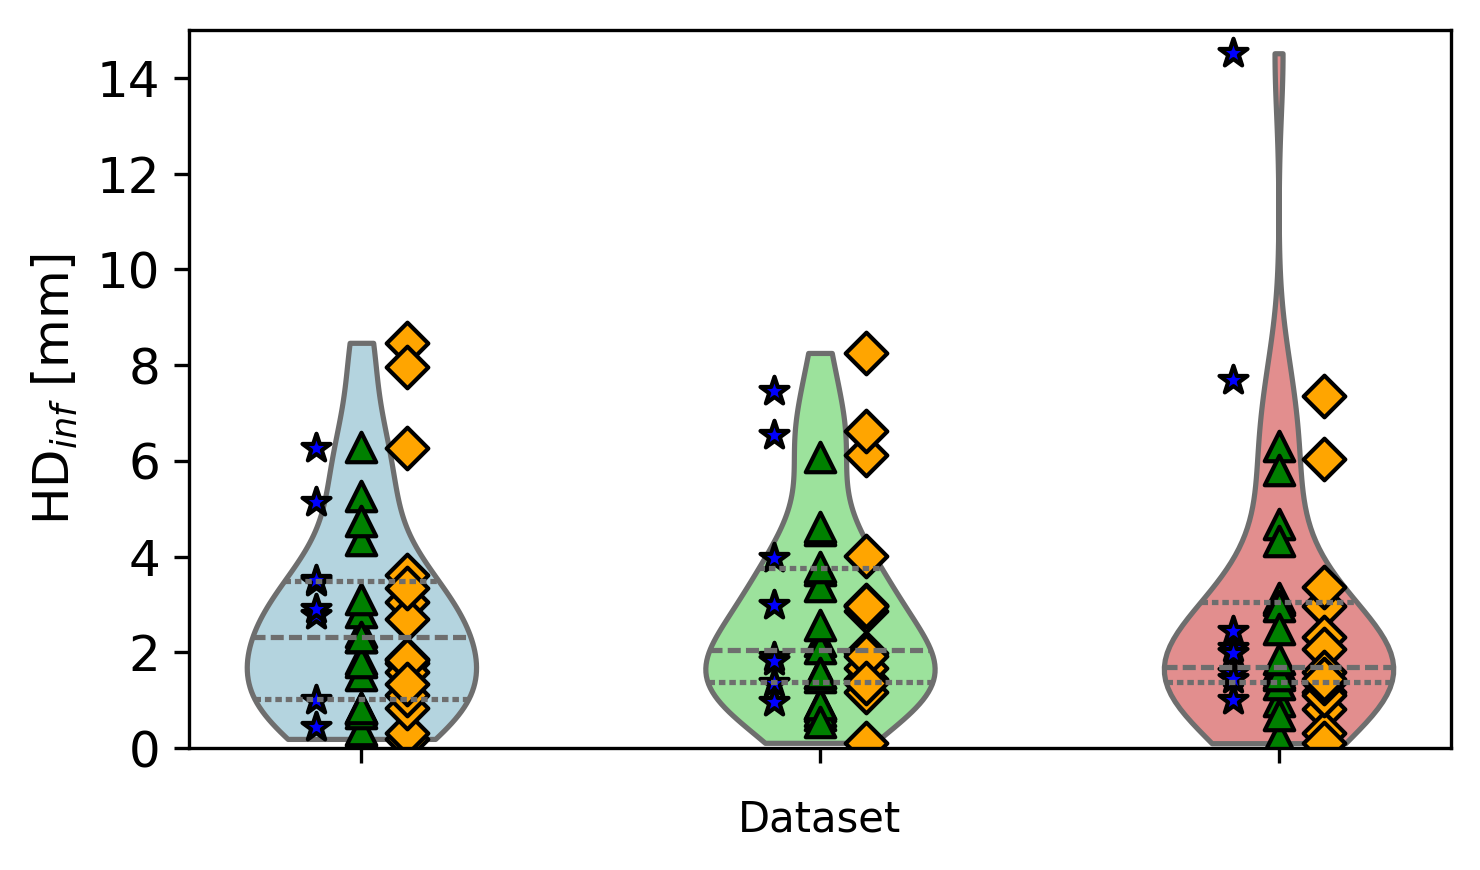

In [94]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D

# Load all runs into a single DataFrame with an added column for each run
runs = ['11', '12', '13']
run_titles = {'11': 'DWI', '12': 'DWI & Avg', '13': 'DWI & Avg & E1'}

all_data = []

for run in runs:
    main = '/Users/saschastocker/Documents/Stanford/work2024/WholeHeartCropISMRM/nnUNetResults'
    csv_file_path = f'{main}/Run{run}/dice_scores_per_case.csv'
    df = pd.read_csv(csv_file_path)

    # Ensure 'Label' column is of type string
    df['Label'] = df['Label'].astype(str)

    # Filter dataframe to only include 'Label 1'
    df = df[df['Label'] == 'Label 1']

    # Extract 'Slice Number' from 'Case ID'
    def extract_slice_number(case_id):
        # Assuming 'Case ID' format: 'Le_Volunteer_01_DiVO_06_10_slice_002'
        parts = case_id.split('_')
        return parts[-1]  # Extracts '002'

    df['Slice Number'] = df['Case ID'].apply(extract_slice_number)

    # Ensure 'Slice Number' has leading zeros
    df['Slice Number'] = df['Slice Number'].astype(str).str.zfill(3)

    # Map 'Slice Number' to 'Slice Name'
    slice_name_mapping = {
        '001': 'Apex',
        '002': 'Mid',
        '003': 'Base'
    }
    df['Slice Name'] = df['Slice Number'].map(slice_name_mapping)

    # Map 'Label' codes to readable names
    label_name_mapping = {
        'Label 1': 'Left Ventricle'
    }
    df['Structure'] = df['Label'].map(label_name_mapping)


    # Add a new column to identify the run
    df['Dataset'] = run_titles[run]

    # Append to the list
    all_data.append(df)

# Combine all runs into a single DataFrame
combined_df = pd.concat(all_data, ignore_index=True)

# Define marker, offset, and color mappings for slices
marker_mapping = {
    'Apex': '*',   # Star for Apex
    'Mid': '^',    # Triangle up for Mid
    'Base': 'D'    # Diamond for Base
}

offset_mapping = {
    'Apex': -0.1,
    'Mid': 0,
    'Base': 0.1
}

slice_color_mapping = {
    'Apex': 'blue',
    'Mid': 'green',
    'Base': 'orange'
}

# Define colors for violin plots (structures)
dataset_palette = {
    'DWI': 'lightblue',
    'DWI & Avg': 'lightgreen',
    'DWI & Avg & E1': 'lightcoral'
}

# Set up the plot
plt.figure(figsize=(5, 3), dpi=300)
plt.title('',fontsize =0)

# Create the violin plot with quartile lines and regions for each dataset
sns.violinplot(
    x='Dataset',
    y='Hausdorff Distance Label 3',
    hue='Dataset',  
    data=combined_df,
    palette=dataset_palette,
    cut=0,
    inner='quartile',  # Add quartile lines and regions
    width=0.5
)

# Overlay individual data points with slice-specific markers and offsets
for idx, dataset in enumerate(combined_df['Dataset'].unique()):
    df_dataset = combined_df[combined_df['Dataset'] == dataset]
    x_position = idx  # x-position for this dataset
    for slice_name in ['Apex', 'Mid', 'Base']:
        df_slice = df_dataset[df_dataset['Slice Name'] == slice_name]
        if not df_slice.empty:
            x_vals = np.full(len(df_slice), x_position + offset_mapping[slice_name])
            plt.scatter(
                x_vals,
                df_slice['Hausdorff Distance Label 3'],
                marker=marker_mapping[slice_name],
                color=slice_color_mapping[slice_name],
                edgecolor='black',
                s=50,
                label=slice_name if idx == 0 else ""  # Add label only once for the legend
            )

# Remove duplicate labels in the legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))



# Set labels and layout
xticks_labels = [' ',' ',' ']
xticks=[0,1,2]
plt.xticks(fontsize=0,ticks=xticks,labels=xticks_labels)
plt.ylabel(r'HD$_{inf}$ [mm]', fontsize = '12')
plt.ylim(0,15)  # Adjust based on your data range
plt.tight_layout()
plt.yticks(fontsize=12)  
plt.show()

plt.show()


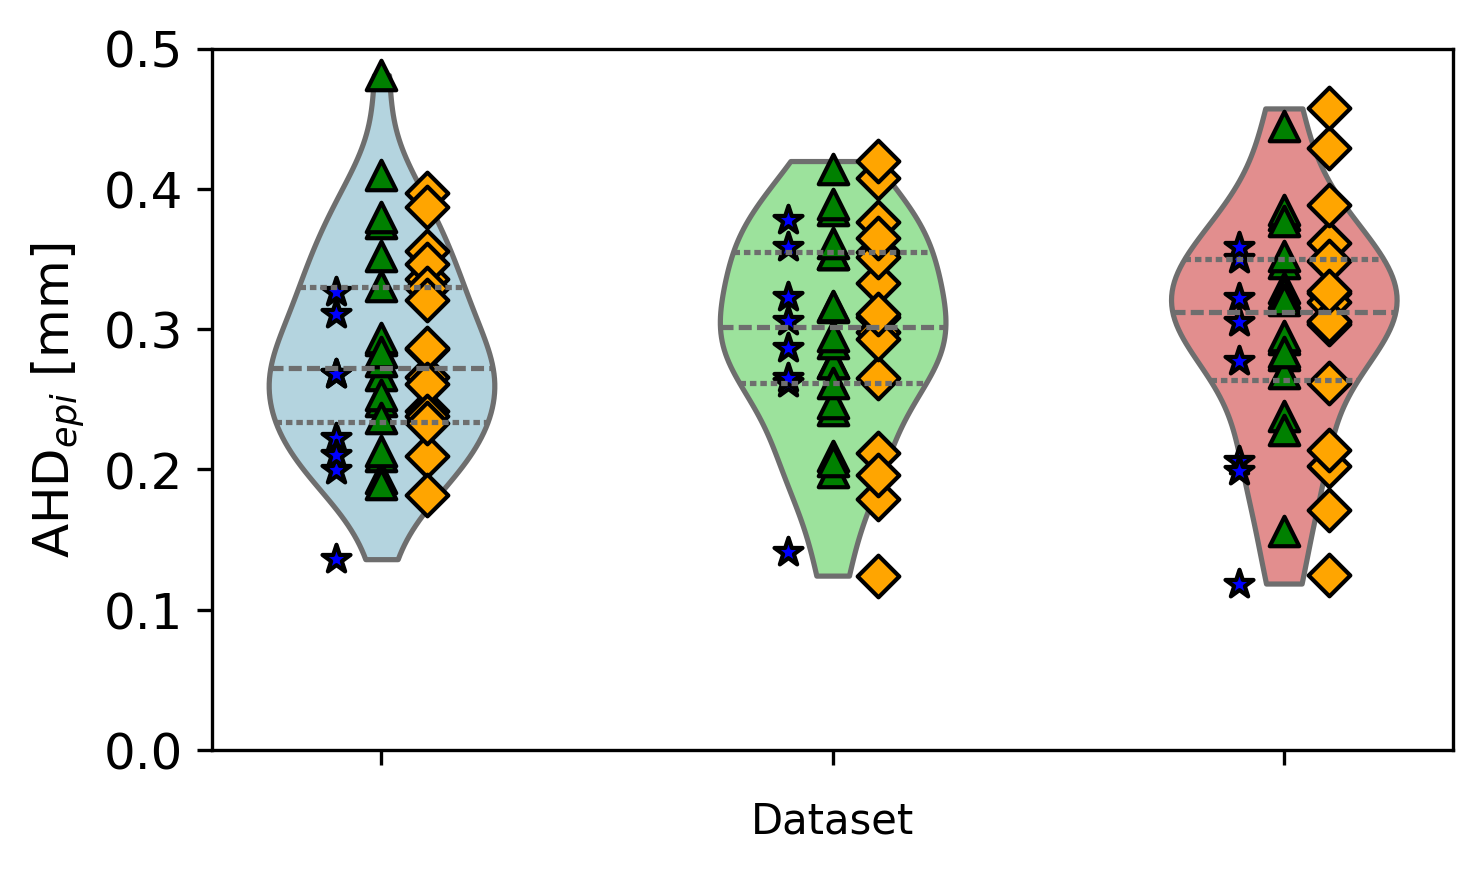

In [90]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D

# Load all runs into a single DataFrame with an added column for each run
runs = ['11', '12', '13']
run_titles = {'11': 'DWI', '12': 'DWI & MD', '13': 'DWI & MD & E1'}

all_data = []

for run in runs:
    main = '/Users/saschastocker/Documents/Stanford/work2024/WholeHeartCropISMRM/nnUNetResults'
    csv_file_path = f'{main}/Run{run}/dice_scores_per_case.csv'
    df = pd.read_csv(csv_file_path)

    # Ensure 'Label' column is of type string
    df['Label'] = df['Label'].astype(str)

    # Filter dataframe to only include 'Label 1'
    df = df[df['Label'] == 'Label 1']

    # Extract 'Slice Number' from 'Case ID'
    def extract_slice_number(case_id):
        # Assuming 'Case ID' format: 'Le_Volunteer_01_DiVO_06_10_slice_002'
        parts = case_id.split('_')
        return parts[-1]  # Extracts '002'

    df['Slice Number'] = df['Case ID'].apply(extract_slice_number)

    # Ensure 'Slice Number' has leading zeros
    df['Slice Number'] = df['Slice Number'].astype(str).str.zfill(3)

    # Map 'Slice Number' to 'Slice Name'
    slice_name_mapping = {
        '001': 'Apex',
        '002': 'Mid',
        '003': 'Base'
    }
    df['Slice Name'] = df['Slice Number'].map(slice_name_mapping)

    # Map 'Label' codes to readable names
    label_name_mapping = {
        'Label 1': 'Left Ventricle'
    }
    df['Structure'] = df['Label'].map(label_name_mapping)


    # Add a new column to identify the run
    df['Dataset'] = run_titles[run]

    # Append to the list
    all_data.append(df)

# Combine all runs into a single DataFrame
combined_df = pd.concat(all_data, ignore_index=True)

# Define marker, offset, and color mappings for slices
marker_mapping = {
    'Apex': '*',   # Star for Apex
    'Mid': '^',    # Triangle up for Mid
    'Base': 'D'    # Diamond for Base
}

offset_mapping = {
    'Apex': -0.1,
    'Mid': 0,
    'Base': 0.1
}

slice_color_mapping = {
    'Apex': 'blue',
    'Mid': 'green',
    'Base': 'orange'
}

# Define colors for violin plots (structures)
dataset_palette = {
    'DWI': 'lightblue',
    'DWI & MD': 'lightgreen',
    'DWI & MD & E1': 'lightcoral'
}

# Set up the plot
plt.figure(figsize=(5, 3), dpi=300)
plt.title('',fontsize =0)

# Create the violin plot with quartile lines and regions for each dataset
sns.violinplot(
    x='Dataset',
    y='Avg. HD Epi',
    hue='Dataset',  
    data=combined_df,
    palette=dataset_palette,
    cut=0,
    inner='quartile',  # Add quartile lines and regions
    width=0.5
)

# Overlay individual data points with slice-specific markers and offsets
for idx, dataset in enumerate(combined_df['Dataset'].unique()):
    df_dataset = combined_df[combined_df['Dataset'] == dataset]
    x_position = idx  # x-position for this dataset
    for slice_name in ['Apex', 'Mid', 'Base']:
        df_slice = df_dataset[df_dataset['Slice Name'] == slice_name]
        if not df_slice.empty:
            x_vals = np.full(len(df_slice), x_position + offset_mapping[slice_name])
            plt.scatter(
                x_vals,
                df_slice['Avg. HD Epi'],
                marker=marker_mapping[slice_name],
                color=slice_color_mapping[slice_name],
                edgecolor='black',
                s=50,
                label=slice_name if idx == 0 else ""  # Add label only once for the legend
            )

# Remove duplicate labels in the legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))


# Set labels and layout
xticks_labels = [' ',' ',' ']
xticks=[0,1,2]
plt.xticks(fontsize=0,ticks=xticks,labels=xticks_labels)
plt.ylabel(r'AHD$_{epi}$ [mm]', fontsize = '12')
plt.ylim(0,0.5)  # Adjust based on your data range
plt.tight_layout()
plt.yticks(fontsize=12)  
plt.show()


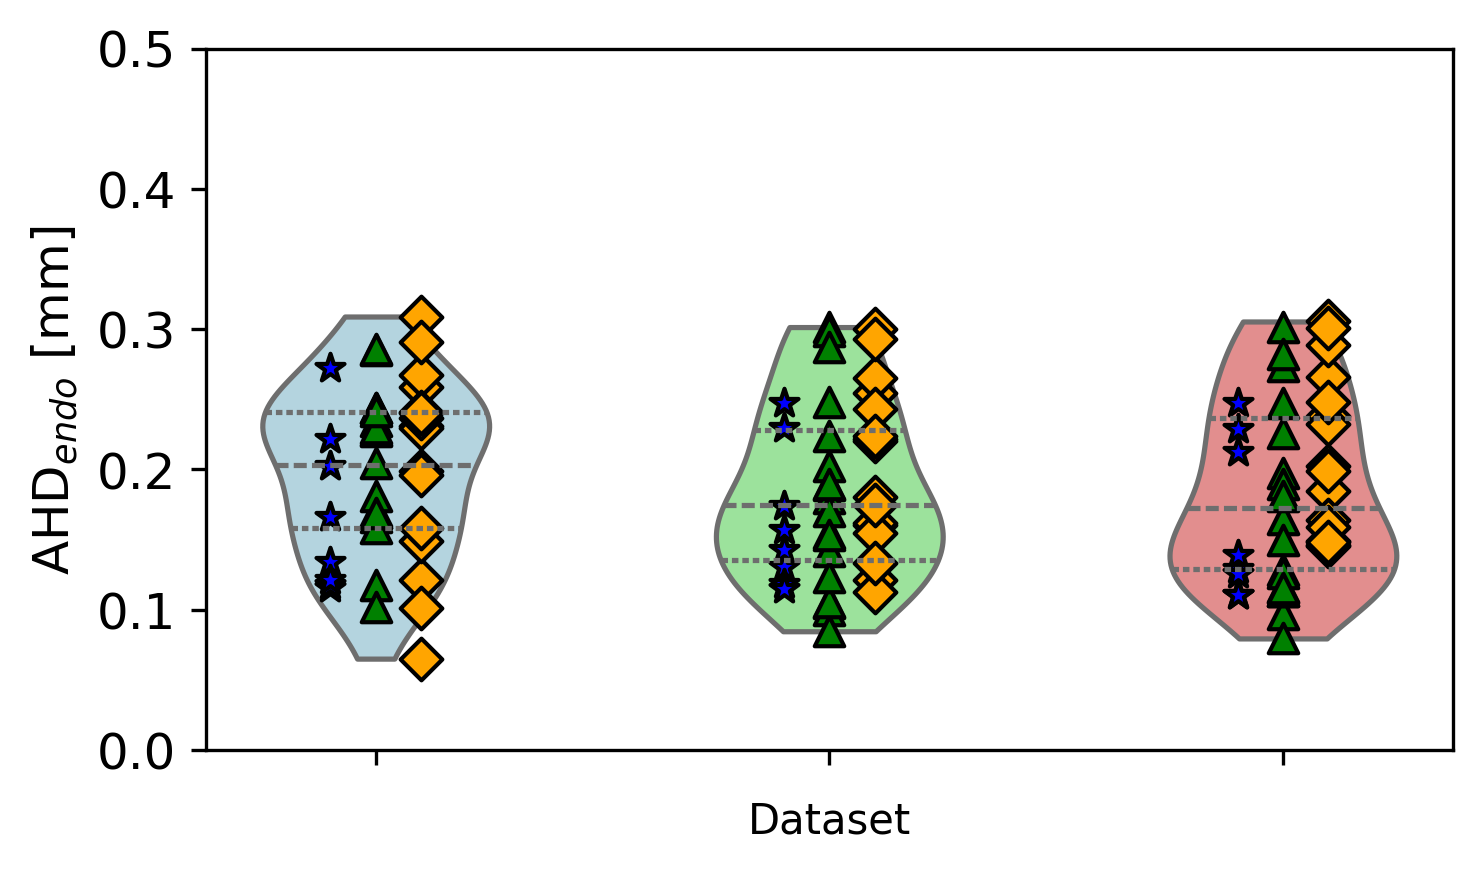

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D

# Load all runs into a single DataFrame with an added column for each run
runs = ['11', '12', '13']
run_titles = {'11': 'DWI', '12': 'DWI & MD', '13': 'DWI & MD & E1'}

all_data = []

for run in runs:
    main = '/Users/saschastocker/Documents/Stanford/work2024/WholeHeartCropISMRM/nnUNetResults'
    csv_file_path = f'{main}/Run{run}/dice_scores_per_case.csv'
    df = pd.read_csv(csv_file_path)

    # Ensure 'Label' column is of type string
    df['Label'] = df['Label'].astype(str)

    # Filter dataframe to only include 'Label 1'
    df = df[df['Label'] == 'Label 1']

    # Extract 'Slice Number' from 'Case ID'
    def extract_slice_number(case_id):
        # Assuming 'Case ID' format: 'Le_Volunteer_01_DiVO_06_10_slice_002'
        parts = case_id.split('_')
        return parts[-1]  # Extracts '002'

    df['Slice Number'] = df['Case ID'].apply(extract_slice_number)

    # Ensure 'Slice Number' has leading zeros
    df['Slice Number'] = df['Slice Number'].astype(str).str.zfill(3)

    # Map 'Slice Number' to 'Slice Name'
    slice_name_mapping = {
        '001': 'Apex',
        '002': 'Mid',
        '003': 'Base'
    }
    df['Slice Name'] = df['Slice Number'].map(slice_name_mapping)

    # Map 'Label' codes to readable names
    label_name_mapping = {
        'Label 1': 'Left Ventricle'
    }
    df['Structure'] = df['Label'].map(label_name_mapping)


    # Add a new column to identify the run
    df['Dataset'] = run_titles[run]

    # Append to the list
    all_data.append(df)

# Combine all runs into a single DataFrame
combined_df = pd.concat(all_data, ignore_index=True)

# Define marker, offset, and color mappings for slices
marker_mapping = {
    'Apex': '*',   # Star for Apex
    'Mid': '^',    # Triangle up for Mid
    'Base': 'D'    # Diamond for Base
}

offset_mapping = {
    'Apex': -0.1,
    'Mid': 0,
    'Base': 0.1
}

slice_color_mapping = {
    'Apex': 'blue',
    'Mid': 'green',
    'Base': 'orange'
}

# Define colors for violin plots (structures)
dataset_palette = {
    'DWI': 'lightblue',
    'DWI & MD': 'lightgreen',
    'DWI & MD & E1': 'lightcoral'
}

# Set up the plot
plt.figure(figsize=(5, 3), dpi=300)
plt.title('')
# Create the violin plot with quartile lines and regions for each dataset
sns.violinplot(
    x='Dataset',
    y='Avg. HD Endo',
    hue='Dataset',  
    data=combined_df,
    palette=dataset_palette,
    cut=0,
    inner='quartile',  # Add quartile lines and regions
    width=0.5
)

# Overlay individual data points with slice-specific markers and offsets
for idx, dataset in enumerate(combined_df['Dataset'].unique()):
    df_dataset = combined_df[combined_df['Dataset'] == dataset]
    x_position = idx  # x-position for this dataset
    for slice_name in ['Apex', 'Mid', 'Base']:
        df_slice = df_dataset[df_dataset['Slice Name'] == slice_name]
        if not df_slice.empty:
            x_vals = np.full(len(df_slice), x_position + offset_mapping[slice_name])
            plt.scatter(
                x_vals,
                df_slice['Avg. HD Endo'],
                marker=marker_mapping[slice_name],
                color=slice_color_mapping[slice_name],
                edgecolor='black',
                s=50,
                label=slice_name if idx == 0 else ""  # Add label only once for the legend
            )

# Remove duplicate labels in the legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))

# Set labels and layout
xticks_labels = [' ',' ',' ']
xticks=[0,1,2]
plt.xticks(fontsize=0,ticks=xticks,labels=xticks_labels)
plt.ylabel(r'AHD$_{endo}$ [mm]', fontsize = '12')
plt.ylim(0,0.5)  # Adjust based on your data range
plt.tight_layout()
plt.yticks(fontsize=12)  
plt.show()


ValueError: Could not interpret value `GT_Median` for `y`. An entry with this name does not appear in `data`.

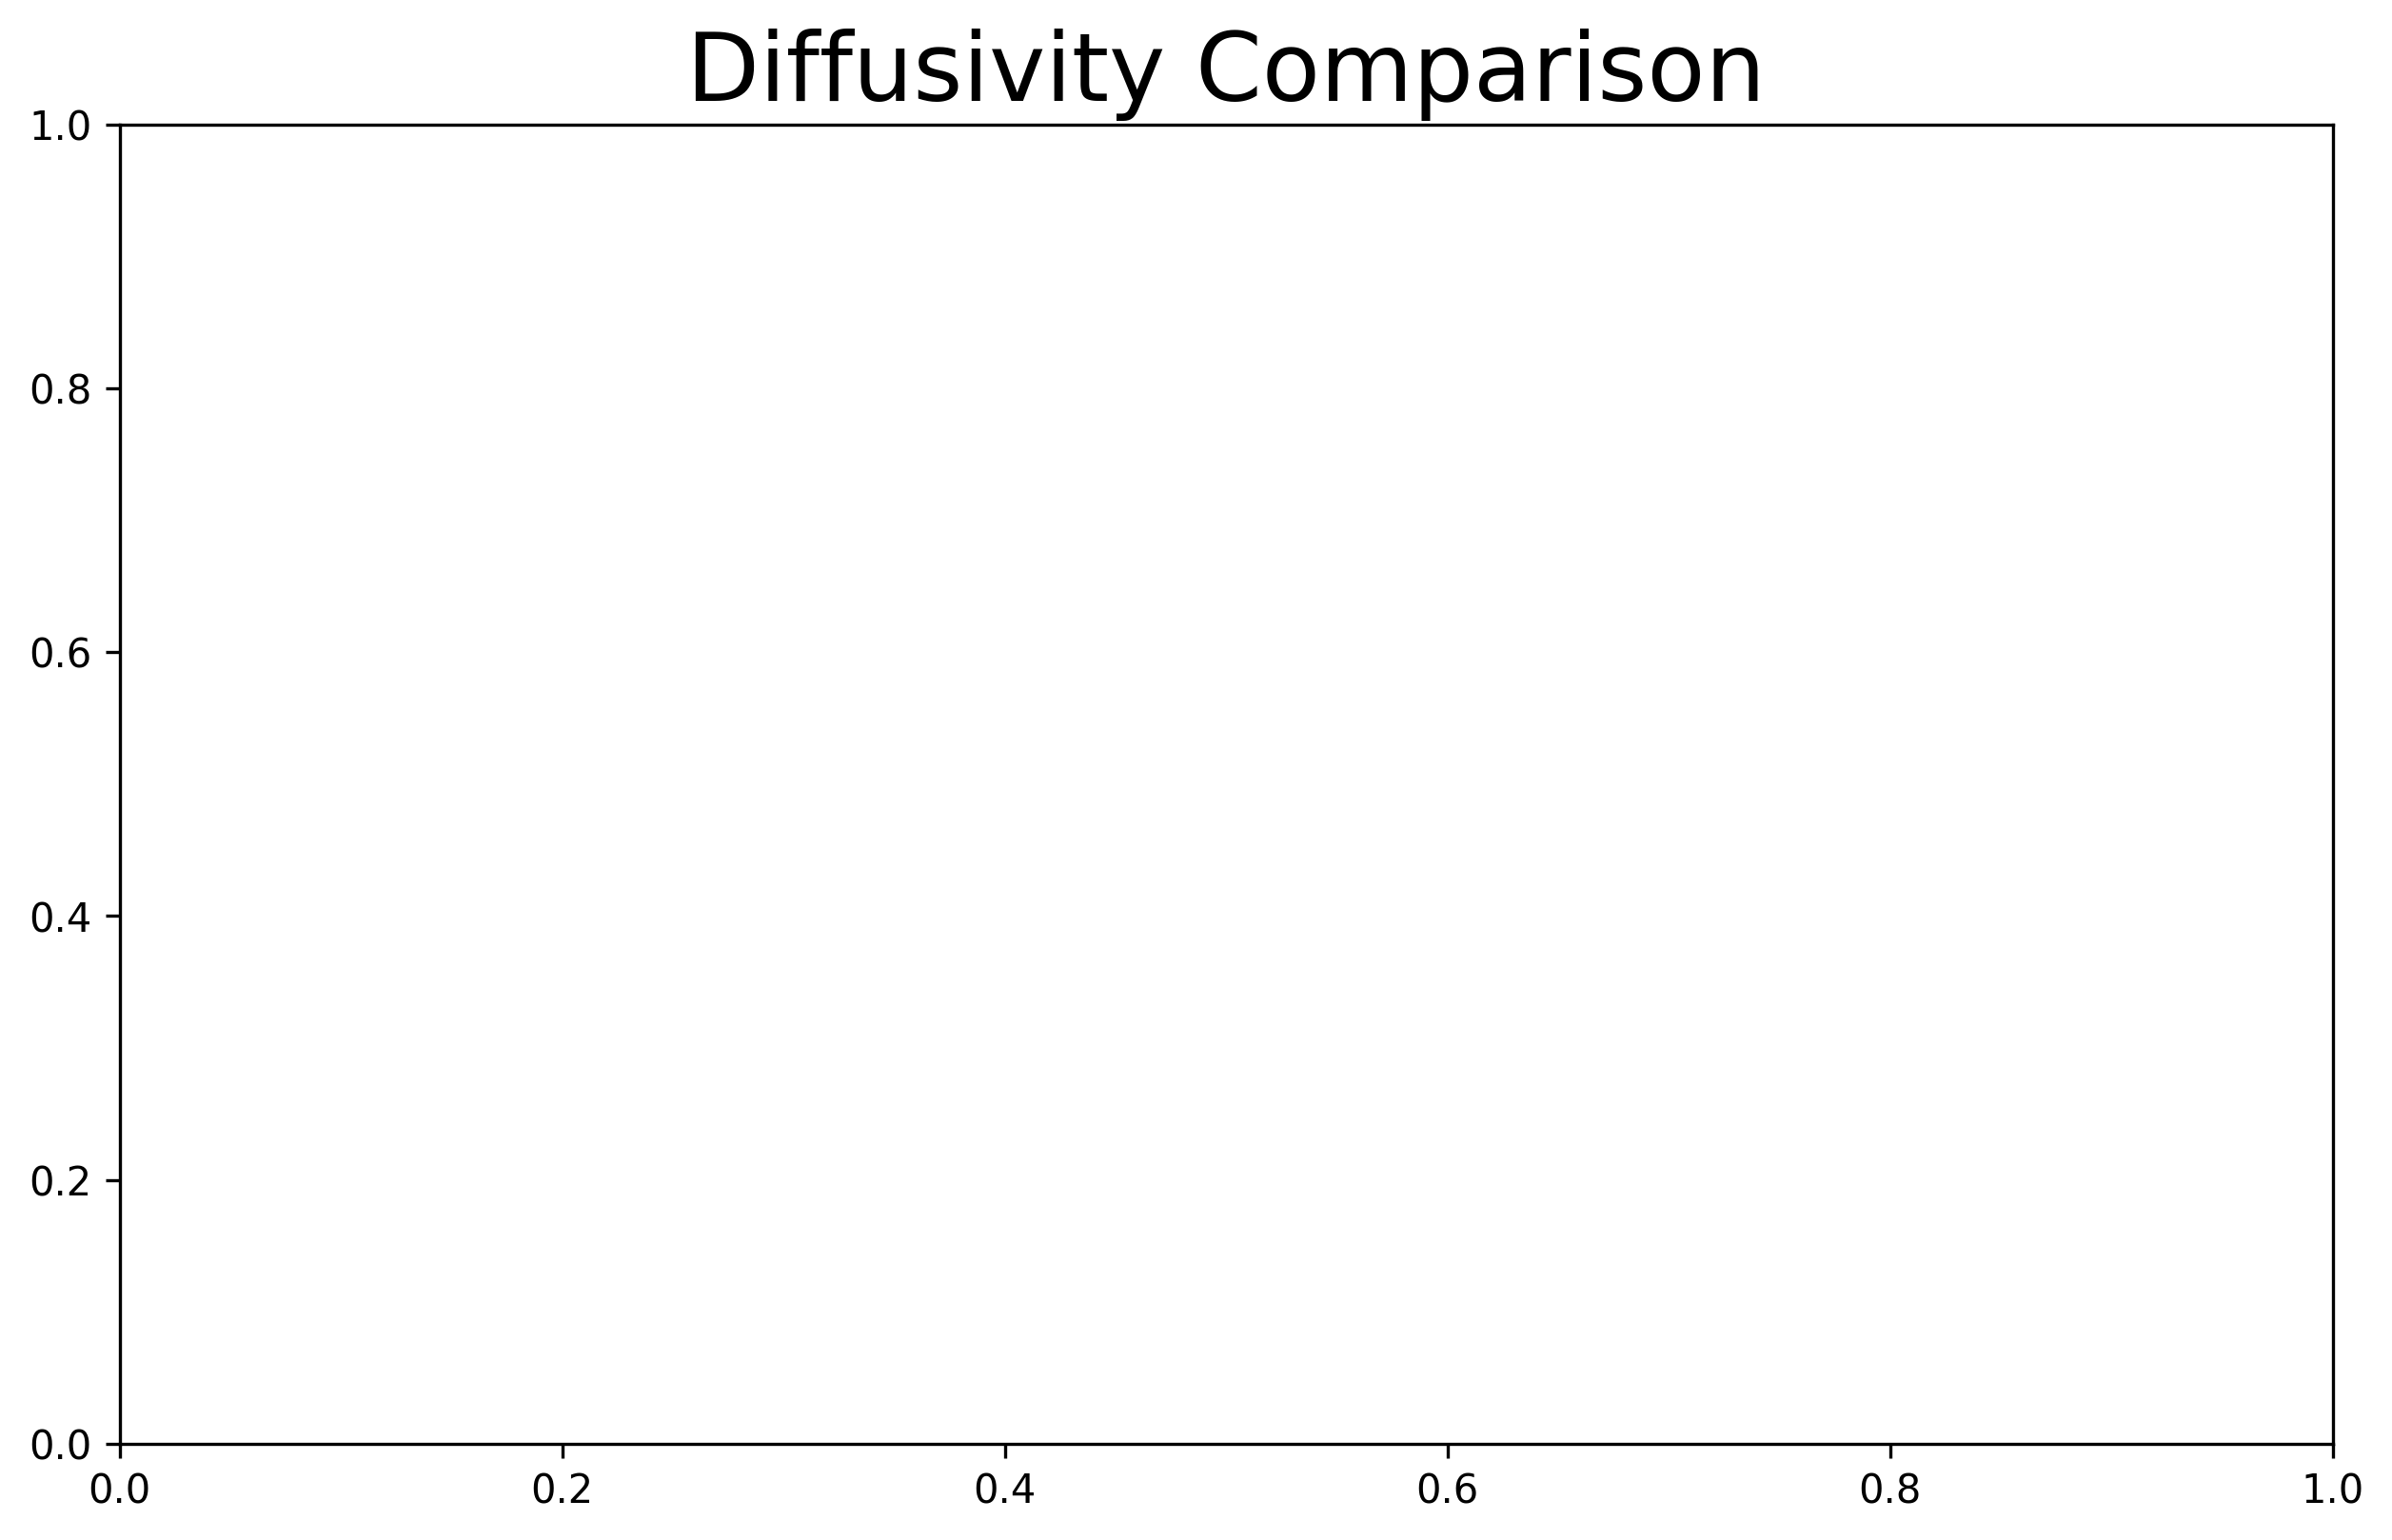